Importing the dataset

In [ ]:
import pandas as pd

# Step 1: Read the CSV file into a DataFrame with a specified encoding
df = pd.read_csv('/content/zomato_indore2.csv', encoding='ISO-8859-1')  # Use 'ISO-8859-1' or another appropriate encoding
df.head()


Sr no.               name                  locality   latitude  longitude  \
0     0.0      Namo Sandwich              Sudama Nagar  22.696331  75.834857   
1     1.0       Bake N Shake  BCM Heights, Vijay Nagar  22.755705  75.895287   
2     2.0    Shree Gurukripa         Sarwate Bus Stand  22.714090  75.868851   
3     3.0  Nafees Restaurant               Old Palasia  22.725712  75.887757   
4     4.0   Hotel Guru Kripa         Sarwate Bus Stand  22.714086  75.868846   

                  cuisines  average_cost_for_two  aggregate_rating   votes  \
0                Fast Food                 500.0               4.3   860.0   
1  Cafe, Fast Food, Bakery                 500.0               4.2   683.0   
2             North Indian                 350.0               4.3  2030.0   
3    North Indian, Mughlai                 800.0               4.3  2987.0   
4             North Indian                 350.0               4.3  3441.0   

  rating_text online_order book_table            rest_type  \
0   Very Good          Yes        Yes        Casual Dining   
1   Very Good          Yes         No        Casual Dining   
2   Very Good          Yes         No  Cafe, Casual Dining   
3   Very Good           No         No          Quick Bites   
4   Very Good           No         No        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                                        reviews_list listed_in(type)  
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...          Buffet  
1  [('Rated 4.0', 'RATED\n  Had been here for din...          Buffet  
2  [('Rated 3.0', "RATED\n  Ambience is not that ...          Buffet  
3  [('Rated 4.0', "RATED\n  Great food and proper...          Buffet  
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...          Buffet

Data Cleaning

In [ ]:
# Function to find the mode for each categorical column with missing values
def find_mode_for_missing_values(df):
    mode_values = {}
    for column in df.columns:
        if df[column].dtype == 'object' and df[column].isnull().any():
            mode_values[column] = df[column].mode()[0]
    return mode_values

# Calculate the mode values for columns with missing values
mode_values = find_mode_for_missing_values(df)

# Print the mode values
print("Mode values for categorical columns with missing values:")
for column, mode_value in mode_values.items():
  print(f"{column}: {mode_value}")

Mode values for categorical columns with missing values:
name: Apna Sweets
locality: Vijay Nagar
cuisines: North Indian
rating_text: Very Good
online_order: Yes
book_table: No
rest_type: Quick Bites
dish_liked: Biryani
reviews_list: []
listed_in(type): Delivery


In [ ]:
categorical_columns = ['rating_text', 'online_order', 'book_table','rest_type','listed_in(type)','dish_liked','reviews_list']  # Specify the columns with categorical data

for column in categorical_columns:
    mode_value = df[column].mode()[0]  # Calculate the mode value for the column
    df[column].fillna(mode_value, inplace=True)  # Replace null values with mode value


In [ ]:
null_values1 = df.isnull().sum()
print(null_values1)

Sr no.                  301
name                    301
locality                301
latitude                301
longitude               301
cuisines                301
average_cost_for_two    301
aggregate_rating        301
votes                   301
rating_text               0
online_order              0
book_table                0
rest_type                 0
dish_liked                0
reviews_list              0
listed_in(type)           0
dtype: int64


In [ ]:
null_values2 = df.isnull().sum()
print(null_values2)

Sr no.                  301
name                    301
locality                301
latitude                301
longitude               301
cuisines                301
average_cost_for_two    301
aggregate_rating        301
votes                   301
rating_text               0
online_order              0
book_table                0
rest_type                 0
dish_liked                0
reviews_list              0
listed_in(type)           0
dtype: int64


In [ ]:
df_1 = df.dropna(subset=['name'])
null_values3 = df_1.isnull().sum()
print(null_values3)

Sr no.                  0
name                    0
locality                0
latitude                0
longitude               0
cuisines                0
average_cost_for_two    0
aggregate_rating        0
votes                   0
rating_text             0
online_order            0
book_table              0
rest_type               0
dish_liked              0
reviews_list            0
listed_in(type)         0
dtype: int64


In [ ]:
df_1.head()

Sr no.               name                  locality   latitude  longitude  \
0     0.0      Namo Sandwich              Sudama Nagar  22.696331  75.834857   
1     1.0       Bake N Shake  BCM Heights, Vijay Nagar  22.755705  75.895287   
2     2.0    Shree Gurukripa         Sarwate Bus Stand  22.714090  75.868851   
3     3.0  Nafees Restaurant               Old Palasia  22.725712  75.887757   
4     4.0   Hotel Guru Kripa         Sarwate Bus Stand  22.714086  75.868846   

                  cuisines  average_cost_for_two  aggregate_rating   votes  \
0                Fast Food                 500.0               4.3   860.0   
1  Cafe, Fast Food, Bakery                 500.0               4.2   683.0   
2             North Indian                 350.0               4.3  2030.0   
3    North Indian, Mughlai                 800.0               4.3  2987.0   
4             North Indian                 350.0               4.3  3441.0   

  rating_text online_order book_table            rest_type  \
0   Very Good          Yes        Yes        Casual Dining   
1   Very Good          Yes         No        Casual Dining   
2   Very Good          Yes         No  Cafe, Casual Dining   
3   Very Good           No         No          Quick Bites   
4   Very Good           No         No        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                                        reviews_list listed_in(type)  
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...          Buffet  
1  [('Rated 4.0', 'RATED\n  Had been here for din...          Buffet  
2  [('Rated 3.0', "RATED\n  Ambience is not that ...          Buffet  
3  [('Rated 4.0', "RATED\n  Great food and proper...          Buffet  
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...          Buffet

In [ ]:
df_1.dtypes

Sr no.                  float64
name                     object
locality                 object
latitude                float64
longitude               float64
cuisines                 object
average_cost_for_two    float64
aggregate_rating        float64
votes                   float64
rating_text              object
online_order             object
book_table               object
rest_type                object
dish_liked               object
reviews_list             object
listed_in(type)          object
dtype: object

In [ ]:
df_1.describe()

Sr no.     latitude    longitude  average_cost_for_two  \
count  2844.000000  2844.000000  2844.000000           2844.000000   
mean   1495.218354    22.725008    75.878976            656.074191   
std     860.562669     0.029456     0.029827            478.682733   
min       0.000000    22.598015    75.000000             50.000000   
25%     736.750000    22.713932    75.868587            300.000000   
50%    1534.500000    22.725682    75.885655            500.000000   
75%    2245.250000    22.750034    75.894870            800.000000   
max    2957.000000    22.801616    75.938489           2600.000000   

       aggregate_rating        votes  
count       2844.000000  2844.000000  
mean           3.886920   511.253165  
std            0.518464   548.170898  
min            2.100000     4.000000  
25%            3.600000    99.000000  
50%            4.000000   409.000000  
75%            4.300000   692.000000  
max            4.900000  3441.000000

Correaltion between variables

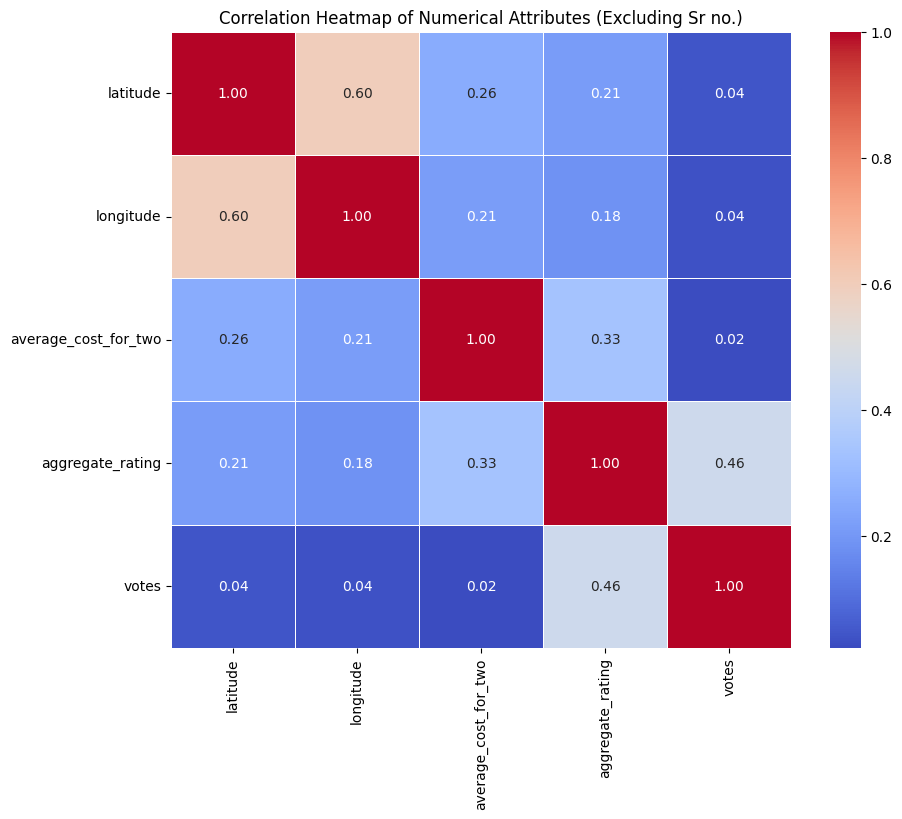

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'Sr no.' column
df_1 = df_1.drop(columns=['Sr no.'])

# Select only the numerical columns
numerical_columns = df_1.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Attributes (Excluding Sr no.)')
plt.show()


Top Liked dishes in Indore

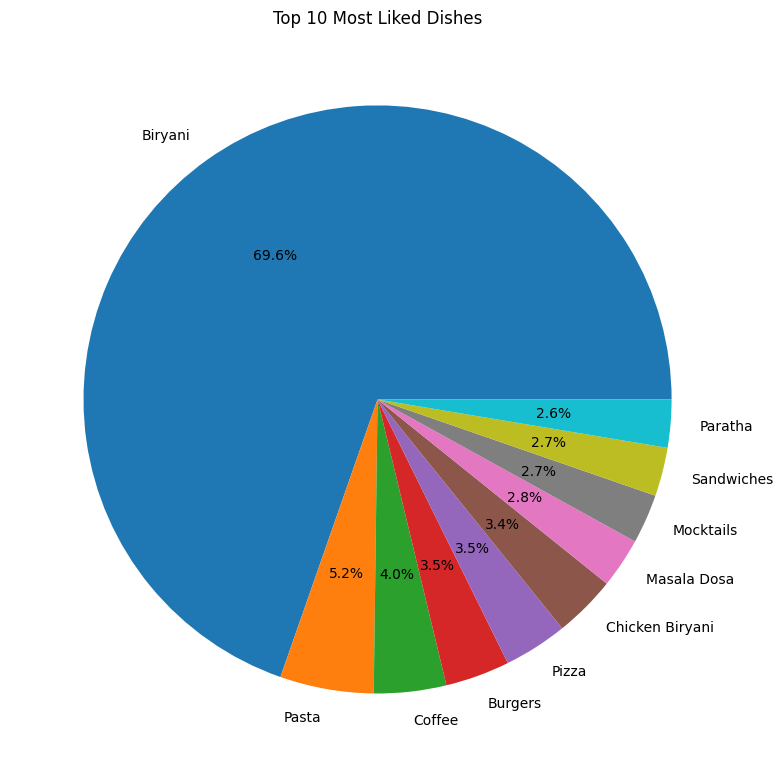

In [ ]:

# Assuming 'dish_liked' column contains comma-separated lists of dishes, split them and count frequencies
all_dishes = df_1['dish_liked'].str.split(', ').explode()
top_10_dishes = all_dishes.value_counts().head(10)

# Plot the top 10 most liked dishes using a pie chart
plt.figure(figsize=(8, 8))
top_10_dishes.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Top 10 Most Liked Dishes')
plt.ylabel('')  # Hide y-label
plt.tight_layout()
plt.show()

Top restaraunt types in Indore

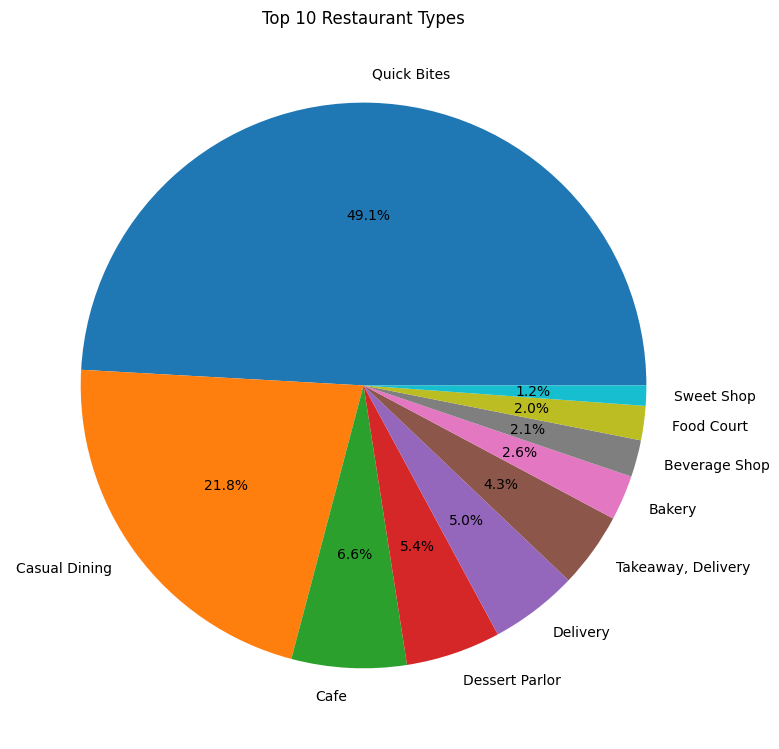

In [ ]:
top_restaurant_types = df_1['rest_type'].value_counts().head(10)

# Plot the top 10 restaurant types using a pie chart
plt.figure(figsize=(8, 8))
top_restaurant_types.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Top 10 Restaurant Types')
plt.ylabel('')  # Hide y-label
plt.tight_layout()
plt.show()

Average Cost and Rating for each restaurant type

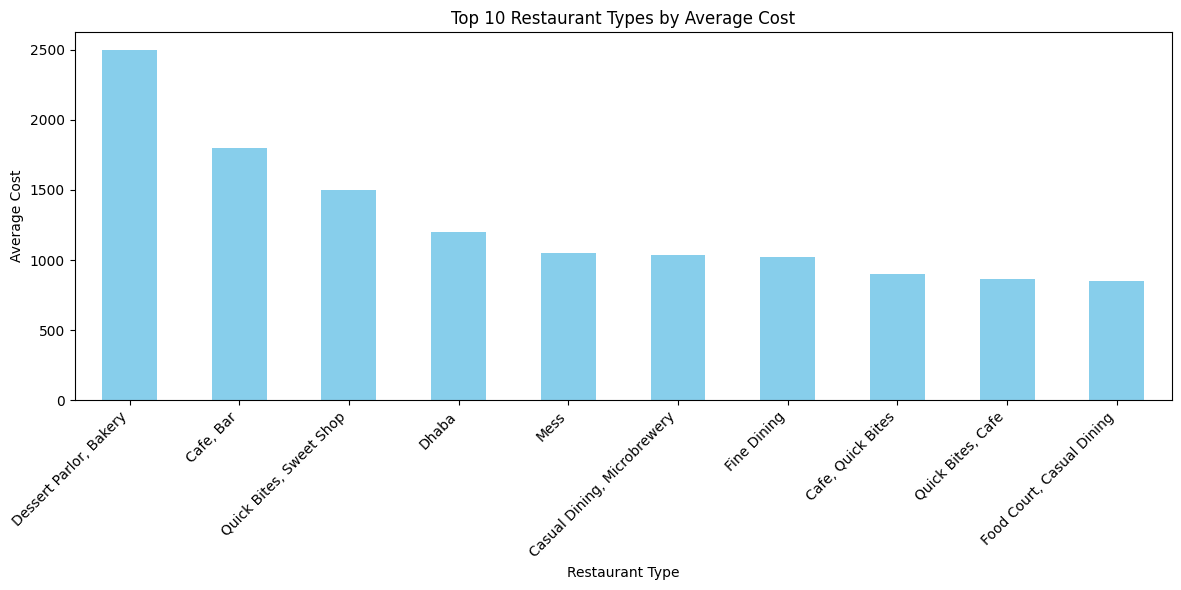

In [ ]:
avg_cost = df_1.groupby('rest_type')['average_cost_for_two'].mean().sort_values(ascending=False).head(10)

# Plot the average cost for each restaurant type
plt.figure(figsize=(12, 6))
avg_cost.plot(kind='bar', color='skyblue')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Cost')
plt.title('Top 10 Restaurant Types by Average Cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

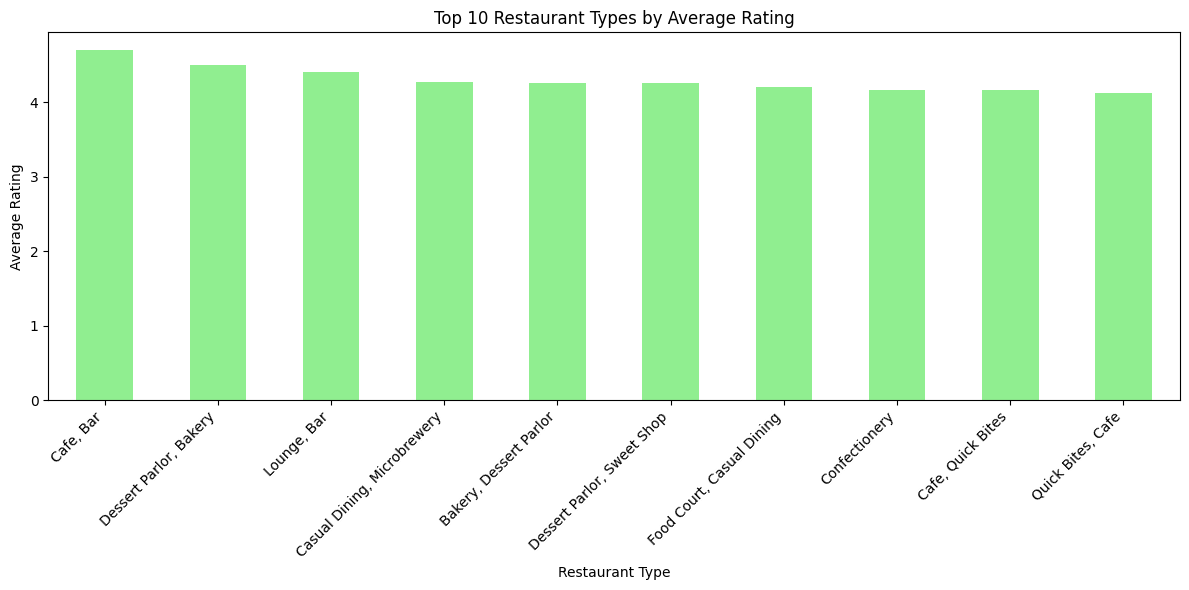

In [ ]:
avg_rating = df_1.groupby('rest_type')['aggregate_rating'].mean().sort_values(ascending=False).head(10)

# Plot the average rating for each restaurant type
plt.figure(figsize=(12, 6))
avg_rating.plot(kind='bar', color='lightgreen')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Rating')
plt.title('Top 10 Restaurant Types by Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 20 cusines in Indore

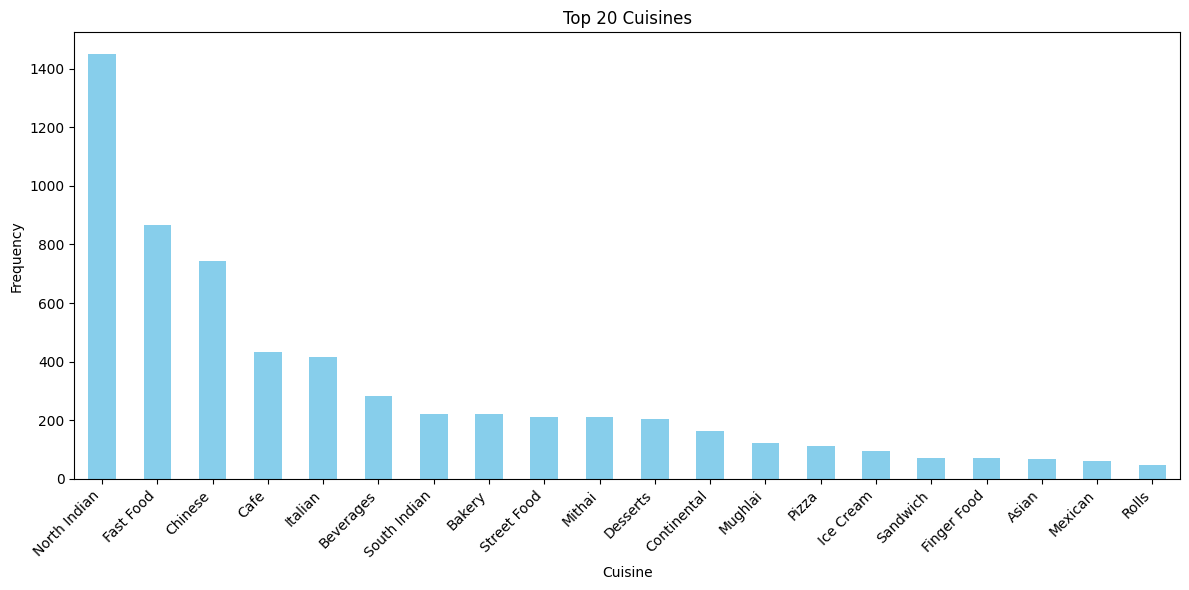

In [ ]:
all_cuisines = df_1['cuisines'].str.split(', ').explode()

# Get the top 20 cuisines based on their frequency
top_20_cuisines = all_cuisines.value_counts().head(20)

# Plot the top 20 cuisines
plt.figure(figsize=(12, 6))
top_20_cuisines.plot(kind='bar', color='skyblue')
plt.title('Top 20 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
all_cuisines = df_1['cuisines'].str.split(', ').explode()

# Remove any leading or trailing whitespaces from cuisine labels
all_cuisines = all_cuisines.str.strip()

# Get unique cuisines
unique_cuisines = all_cuisines.unique()

# Print the list of unique cuisines
print(unique_cuisines)

['Fast Food' 'Cafe' 'Bakery' 'North Indian' 'Mughlai' 'South Indian'
 'Mithai' 'Beverages' 'Chinese' 'Pizza' 'Italian' 'Bar Food' 'Burger'
 'Asian' 'Continental' 'Street Food' 'Desserts' 'Rolls' 'Sandwich'
 'Finger Food' 'Biryani' 'Momos' 'Mediterranean' 'Mexican' 'Japanese'
 'Kashmiri' 'Awadhi' 'Modern Indian' 'BBQ' 'American' 'Maharashtrian'
 'Ice Cream' 'Tea' 'Coffee' 'Paan' 'Tibetan' 'Juices' 'Gujarati' 'French'
 'Healthy Food' 'Wraps' 'Rajasthani' 'Salad' 'Seafood' 'Kebab' 'Lebanese'
 'Arabian' 'Andhra' 'Thai']


Top service types in Indore

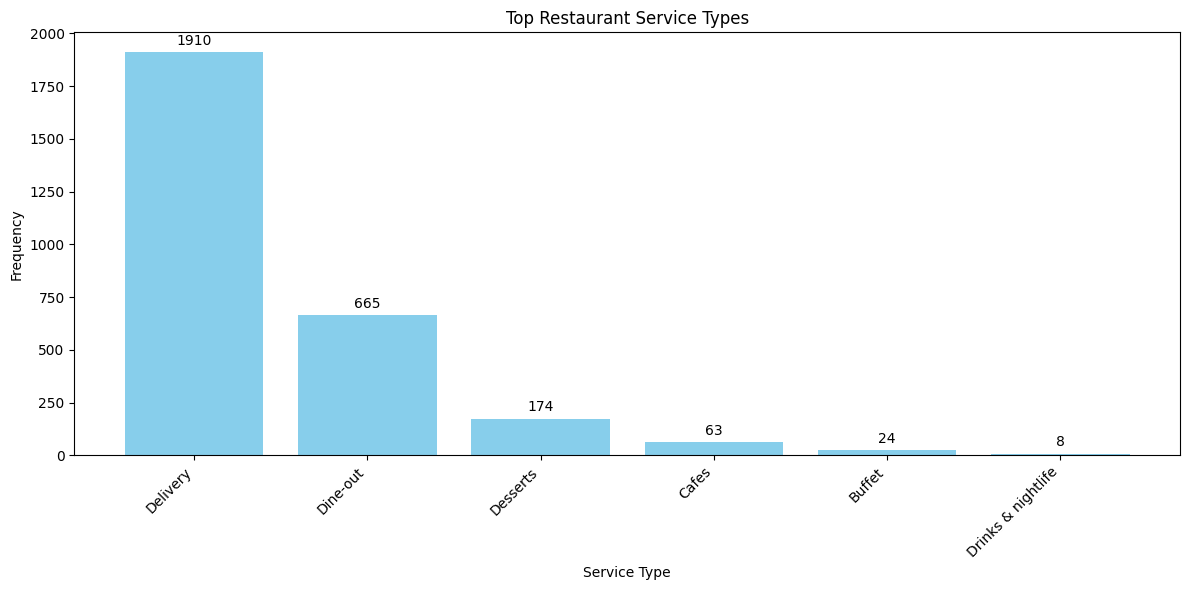

In [ ]:
service_type_counts = df_1['listed_in(type)'].value_counts()

# Plot the histogram of the top restaurant service types
plt.figure(figsize=(12, 6))
bars = plt.bar(service_type_counts.index, service_type_counts.values, color='skyblue')

# Add annotations to each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.title('Top Restaurant Service Types')
plt.xlabel('Service Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

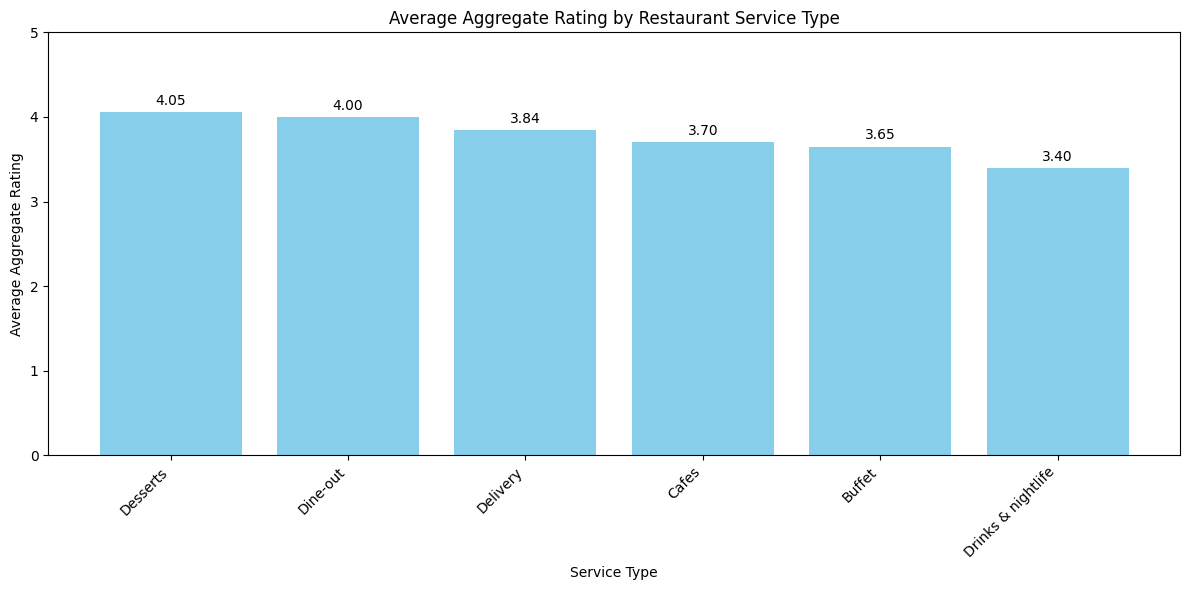

In [ ]:
avg_rating_by_service_type = df_1.groupby('listed_in(type)')['aggregate_rating'].mean().sort_values(ascending=False)

# Plot the bar chart of the average aggregate rating by service type
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_rating_by_service_type.index, avg_rating_by_service_type.values, color='skyblue')

# Add annotations to each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.title('Average Aggregate Rating by Restaurant Service Type')
plt.xlabel('Service Type')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)  # Assuming the rating scale is from 0 to 5
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

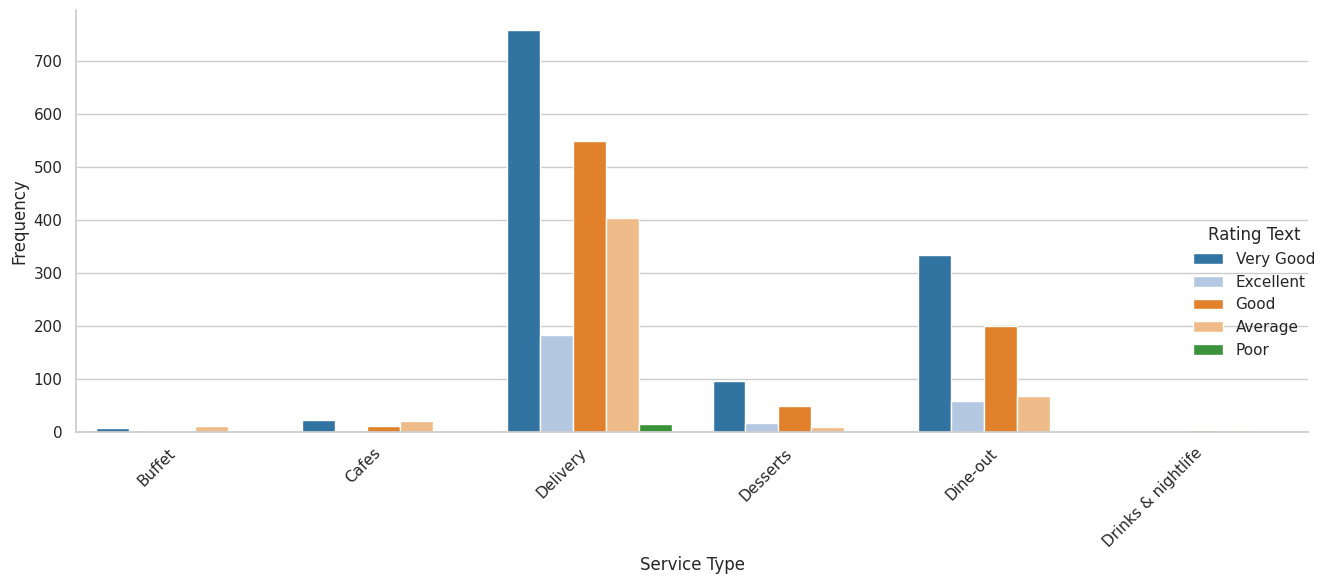

In [ ]:
# Melt the dataset to long format for seaborn
df_melted = df_1.melt(id_vars=['listed_in(type)'], value_vars=['rating_text'], var_name='Type', value_name='Rating')

# Plot using seaborn's catplot
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")
g = sns.catplot(
    data=df_melted,
    x='listed_in(type)',
    hue='Rating',
    kind='count',
    height=6,
    aspect=2,
    palette='tab20',
    legend_out=True
)
g.set_axis_labels("Service Type", "Frequency")
g.set_titles("Rating Text Distribution by Restaurant Service Type")
g.set_xticklabels(rotation=45, ha='right')
g.legend.set_title('Rating Text')

plt.tight_layout()
plt.show()

Distribution of agg rating

<ipython-input-20-1366ba5a4fad>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_1['aggregate_rating'], shade=True, color='skyblue')


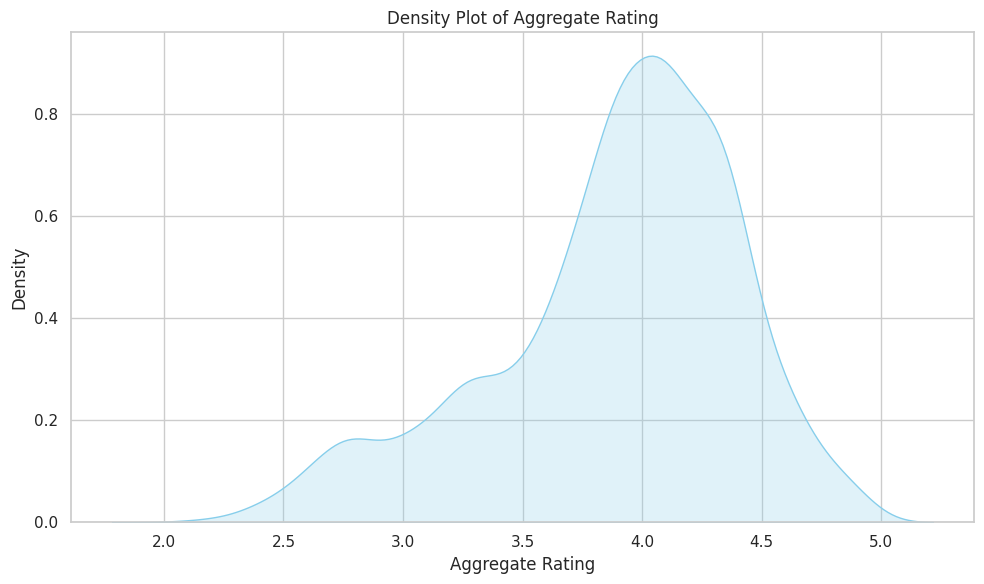

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_1['aggregate_rating'], shade=True, color='skyblue')
plt.title('Density Plot of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

Number of votes vs aggregate_rating

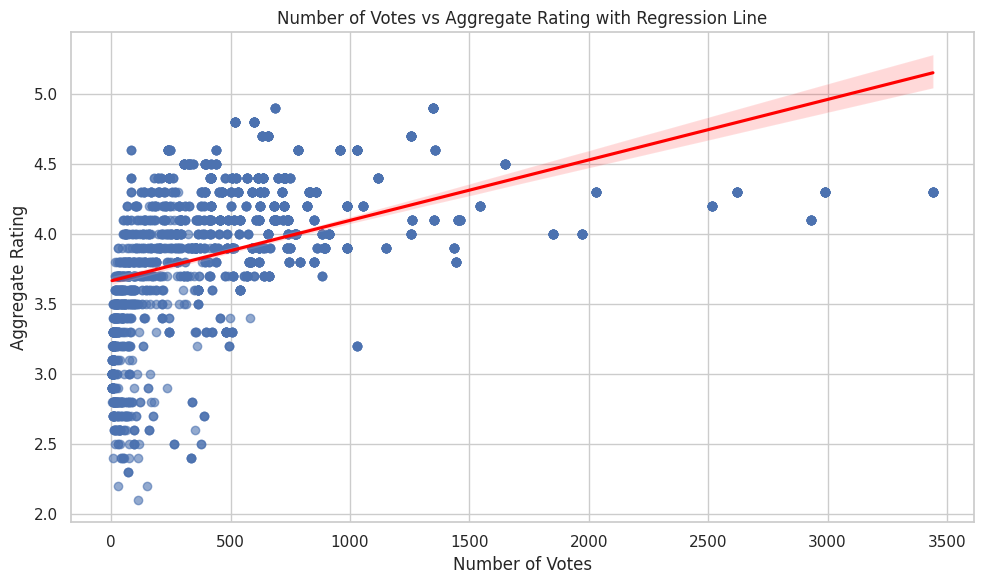

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_1, x='votes', y='aggregate_rating', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

plt.title('Number of Votes vs Aggregate Rating with Regression Line')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


Probablity distribution of average_cost

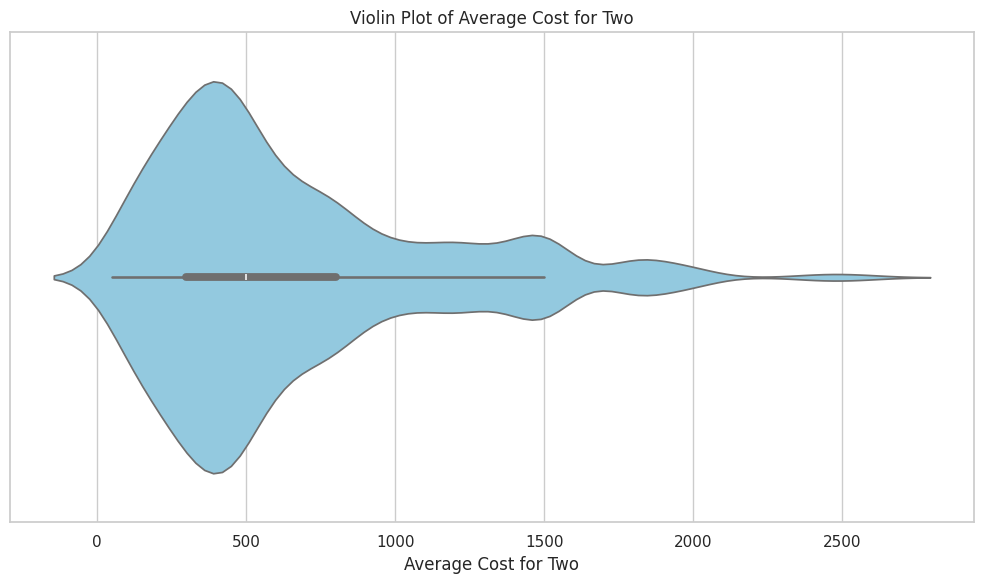

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_1['average_cost_for_two'], color='skyblue')
plt.title('Violin Plot of Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.tight_layout()
plt.show()


Relation of ratings and high cost restaurants

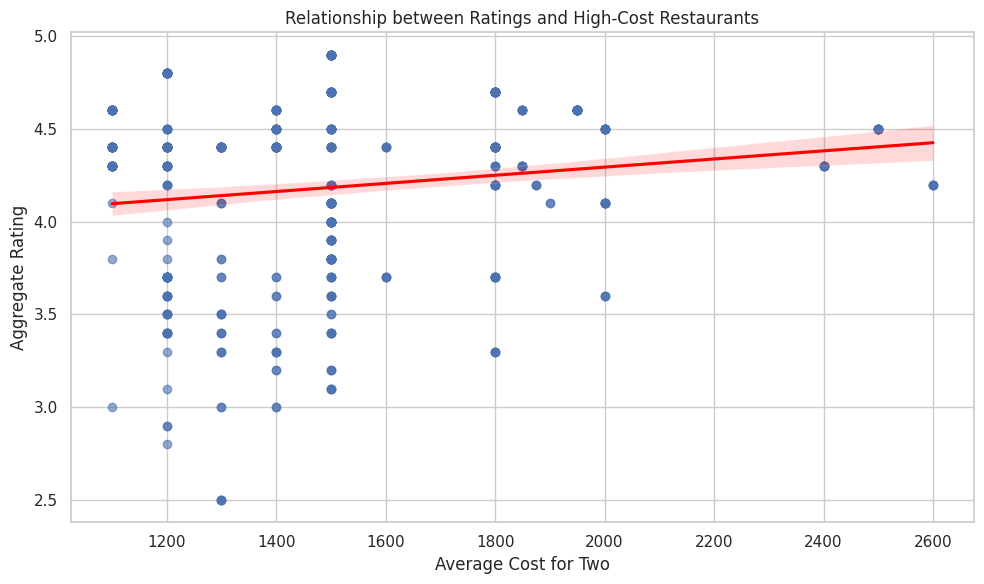

In [ ]:
high_cost_threshold = 1000

# Filter the dataset for high-cost restaurants
high_cost_df = df_1[df_1['average_cost_for_two'] > high_cost_threshold]

# Plot the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='average_cost_for_two', y='aggregate_rating', data=high_cost_df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relationship between Ratings and High-Cost Restaurants')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-24-6e5ca4594a1d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cost_bracket', y='aggregate_rating', data=df_1, palette='muted')


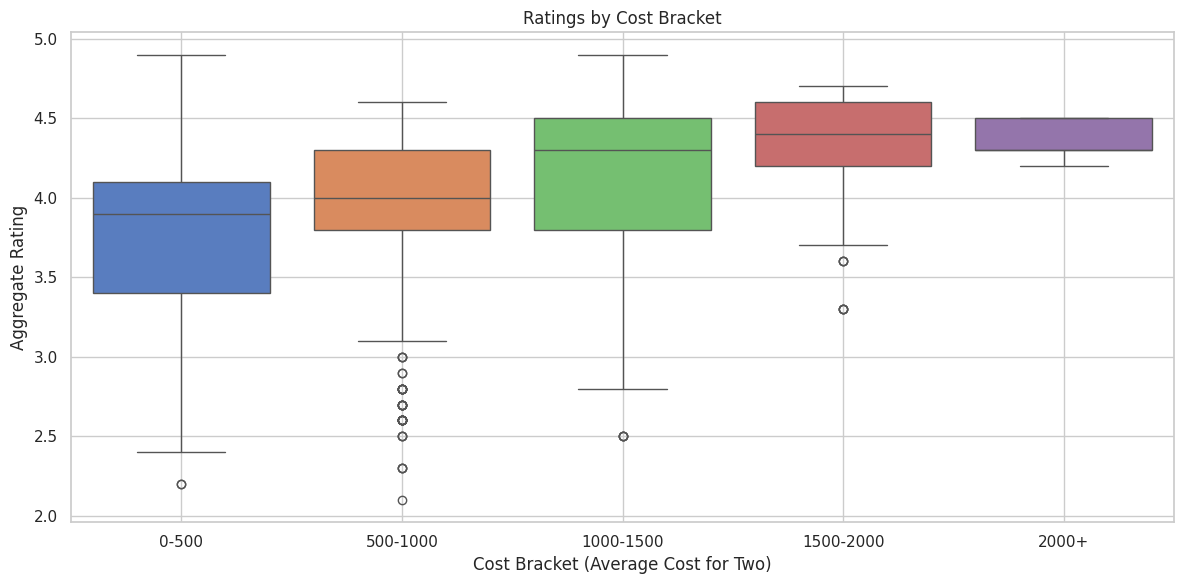

In [ ]:
# Define cost brackets
cost_brackets = pd.cut(df_1['average_cost_for_two'], bins=[0, 500, 1000, 1500, 2000, 5000], labels=['0-500', '500-1000', '1000-1500', '1500-2000', '2000+'])

# Add the cost brackets to the dataframe
df_1['cost_bracket'] = cost_brackets

# Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='cost_bracket', y='aggregate_rating', data=df_1, palette='muted')
plt.title('Ratings by Cost Bracket')
plt.xlabel('Cost Bracket (Average Cost for Two)')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


Scatter plot for aggregate rating over average cost

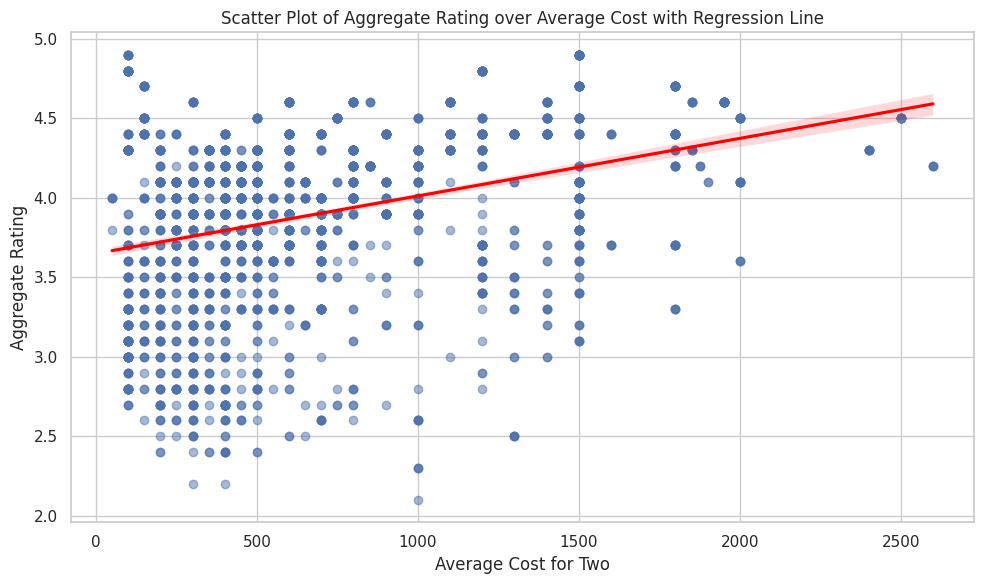

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_1, x='average_cost_for_two', y='aggregate_rating', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot of Aggregate Rating over Average Cost with Regression Line')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

Restaurant Distribution over locality

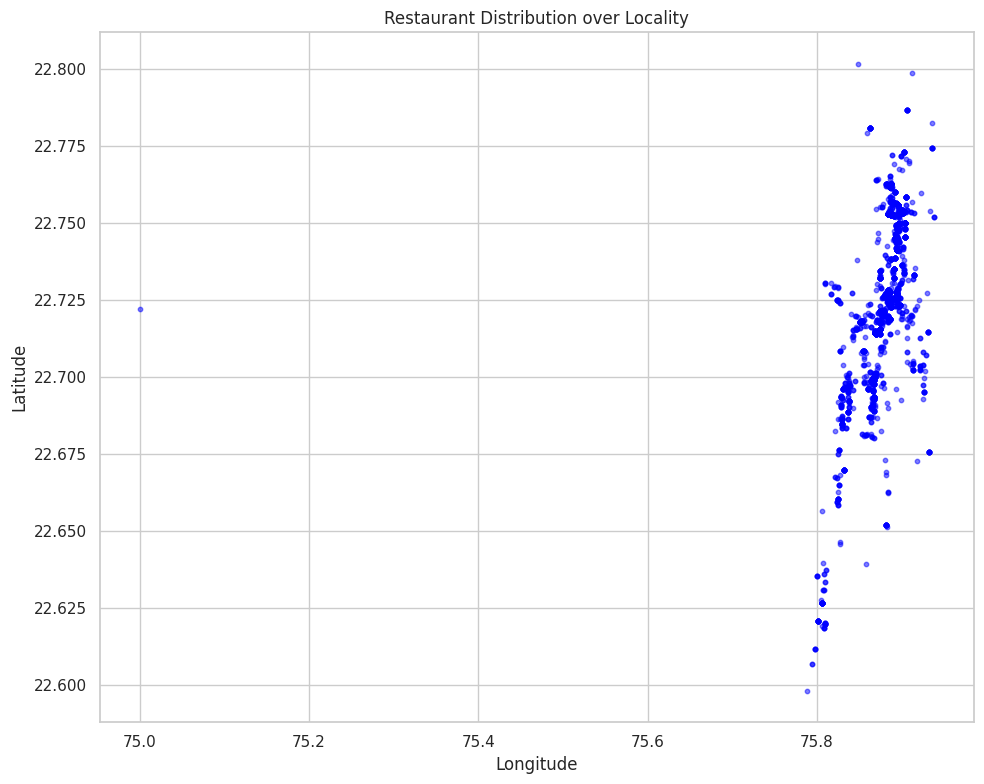

In [ ]:
# Extract longitude and latitude columns
longitude = df_1['longitude']
latitude = df_1['latitude']

# Plot the distribution of restaurants
plt.figure(figsize=(10, 8))
plt.scatter(longitude, latitude, s=10, alpha=0.5, color='blue')  # Adjust size, transparency, and color as needed
plt.title('Restaurant Distribution over Locality')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

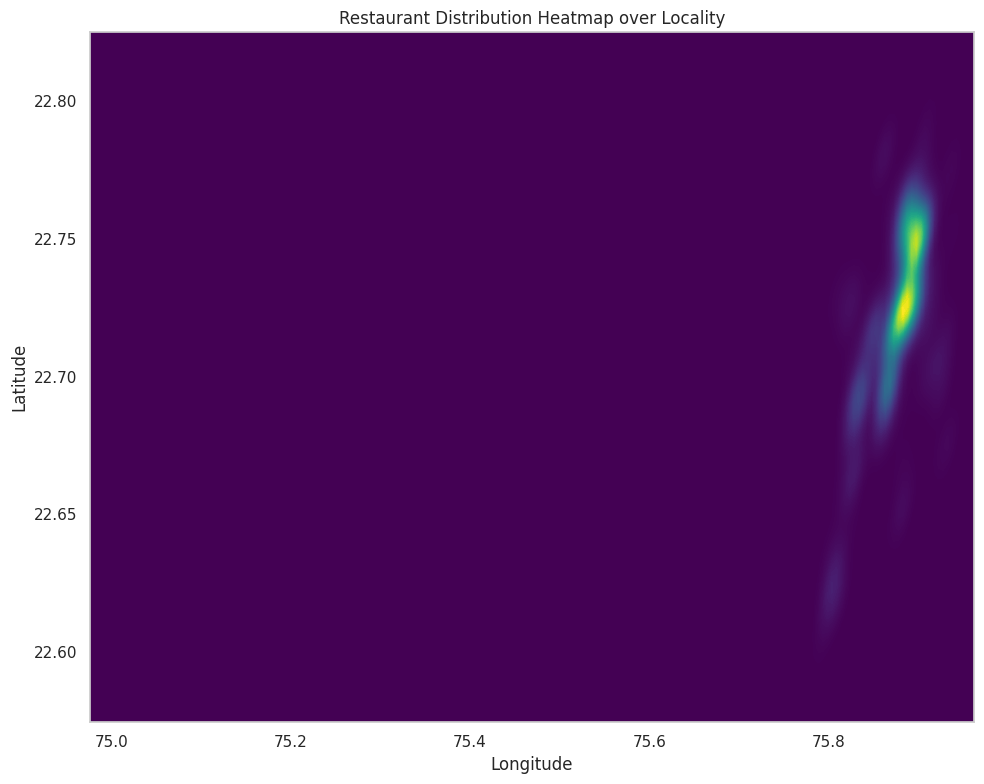

In [ ]:
plt.figure(figsize=(10, 8))
sns.kdeplot(x=longitude, y=latitude, cmap='viridis', fill=True, thresh=0, levels=100)
plt.title('Restaurant Distribution Heatmap over Locality')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

Aggregate Rating per Locality

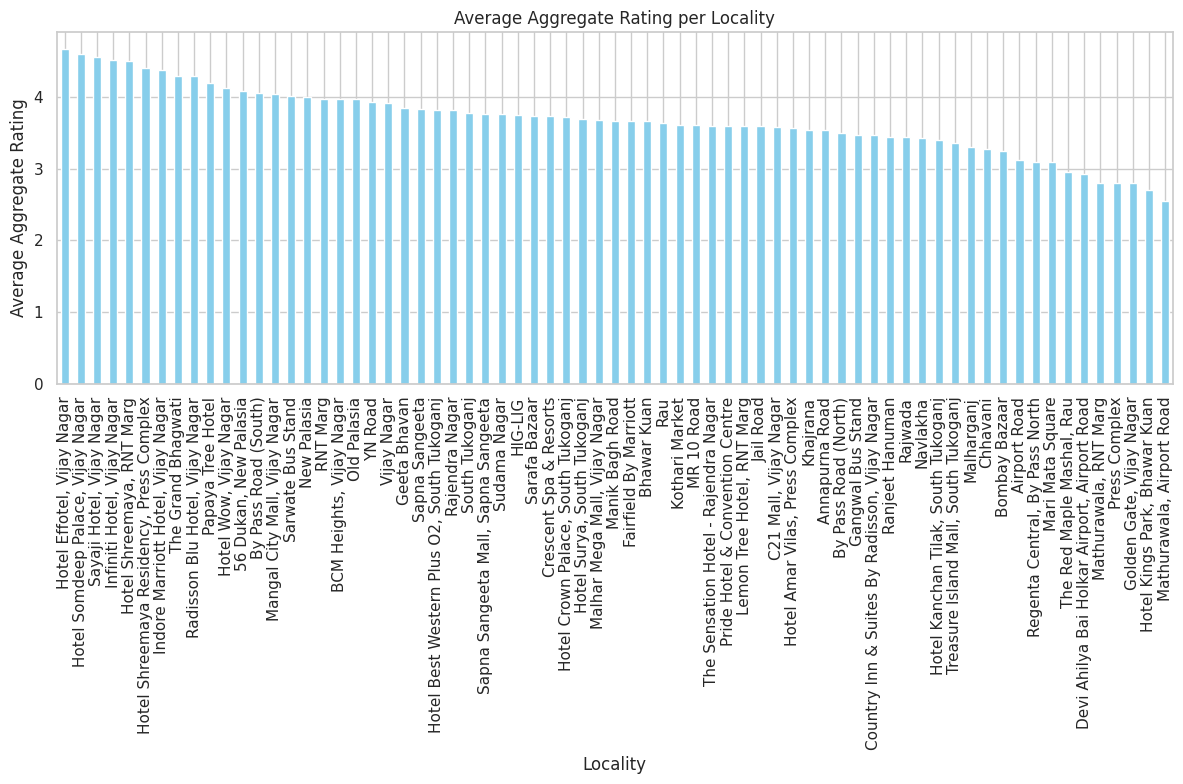

In [ ]:
avg_rating_per_locality = df_1.groupby('locality')['aggregate_rating'].mean().sort_values(ascending=False)

# Plot average aggregate rating per locality
plt.figure(figsize=(12, 8))
avg_rating_per_locality.plot(kind='bar', color='skyblue')
plt.title('Average Aggregate Rating per Locality')
plt.xlabel('Locality')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
df_1.columns

Index(['name', 'locality', 'latitude', 'longitude', 'cuisines',
       'average_cost_for_two', 'aggregate_rating', 'votes', 'rating_text',
       'online_order', 'book_table', 'rest_type', 'dish_liked', 'reviews_list',
       'listed_in(type)', 'cost_bracket'],
      dtype='object')

How many restaurants have online order service & book table service

Total number of restaurants that offer both online order and book table services: 166


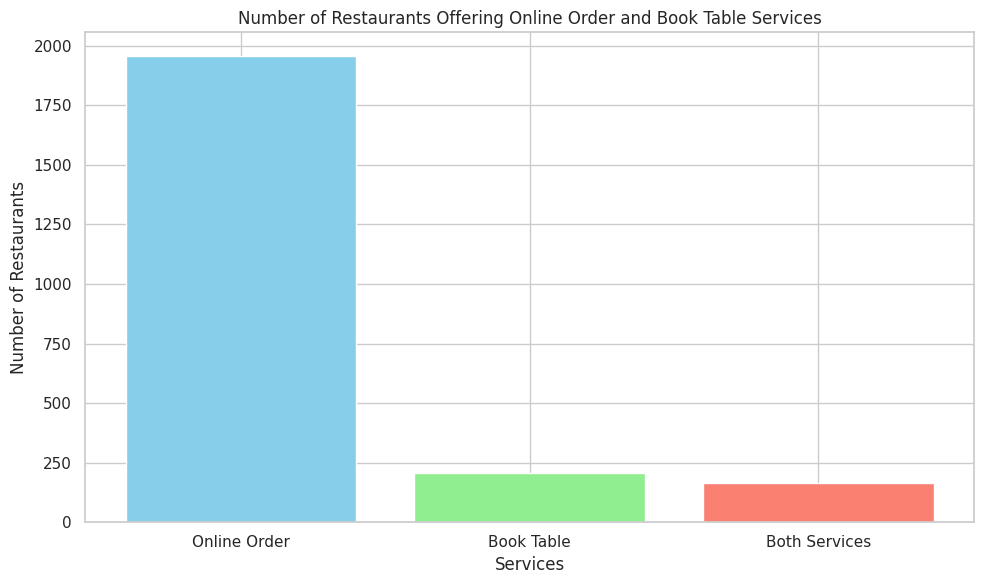

In [ ]:
# Filter the dataframe for restaurants that offer both online order and book table services
online_and_book_table = df_1[(df_1['online_order'] == 'Yes') & (df_1['book_table'] == 'Yes')]

# Get the count of such restaurants
count_online_and_book_table = online_and_book_table.shape[0]

print(f'Total number of restaurants that offer both online order and book table services: {count_online_and_book_table}')

# Count the number of restaurants offering each service
online_order_count = df_1[df_1['online_order'] == 'Yes'].shape[0]
book_table_count = df_1[df_1['book_table'] == 'Yes'].shape[0]

# Data for the bar chart
services = ['Online Order', 'Book Table', 'Both Services']
counts = [online_order_count, book_table_count, count_online_and_book_table]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(services, counts, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Services')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants Offering Online Order and Book Table Services')
plt.tight_layout()
plt.show()

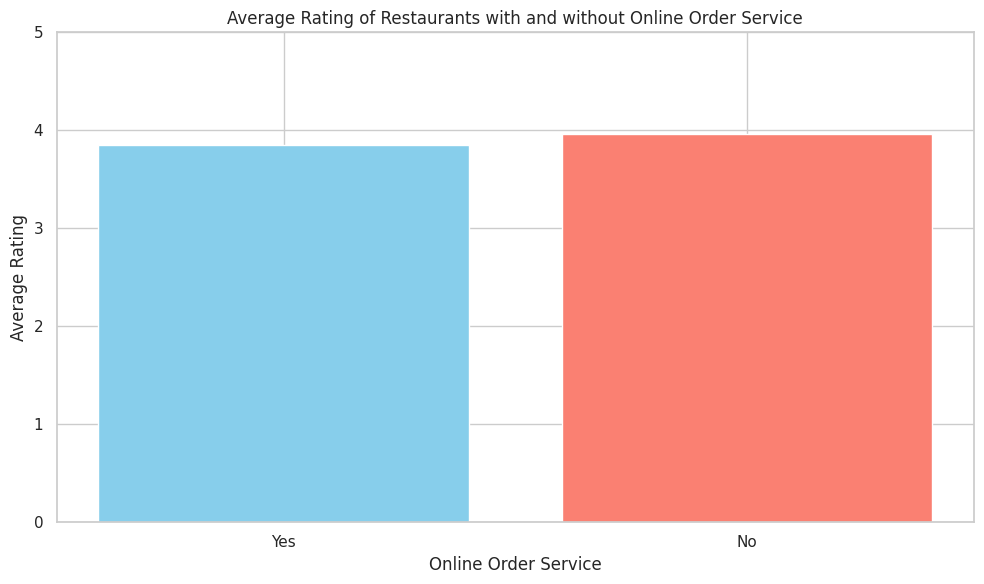

In [ ]:
average_rating_online_order = df_1[df_1['online_order'] == 'Yes']['aggregate_rating'].mean()
average_rating_no_online_order = df_1[df_1['online_order'] == 'No']['aggregate_rating'].mean()

# Create a dataframe for visualization
rating_comparison = pd.DataFrame({
    'Online Order Service': ['Yes', 'No'],
    'Average Rating': [average_rating_online_order, average_rating_no_online_order]
})

# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.bar(rating_comparison['Online Order Service'], rating_comparison['Average Rating'], color=['skyblue', 'salmon'])
plt.xlabel('Online Order Service')
plt.ylabel('Average Rating')
plt.title('Average Rating of Restaurants with and without Online Order Service')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

online_order
Yes    1958
No      886
Name: count, dtype: int64
Number of restaurants providing online order service: 1958
                               name  aggregate_rating
300           Joshi Dahi Bada House          4.900000
316      Kebabsville - Sayaji Hotel          4.900000
617        The Cube - Hotel Effotel          4.800000
165         Cravings - Sayaji Hotel          4.700000
413  Mustang - Hotel Somdeep Palace          4.700000
664               Vijay Chaat House          4.676923
427              Naturals Ice Cream          4.662500
441     Ni Hao - Radisson Blu Hotel          4.600000
575                          Simi's          4.600000
497    SD 21 - Hotel Somdeep Palace          4.600000


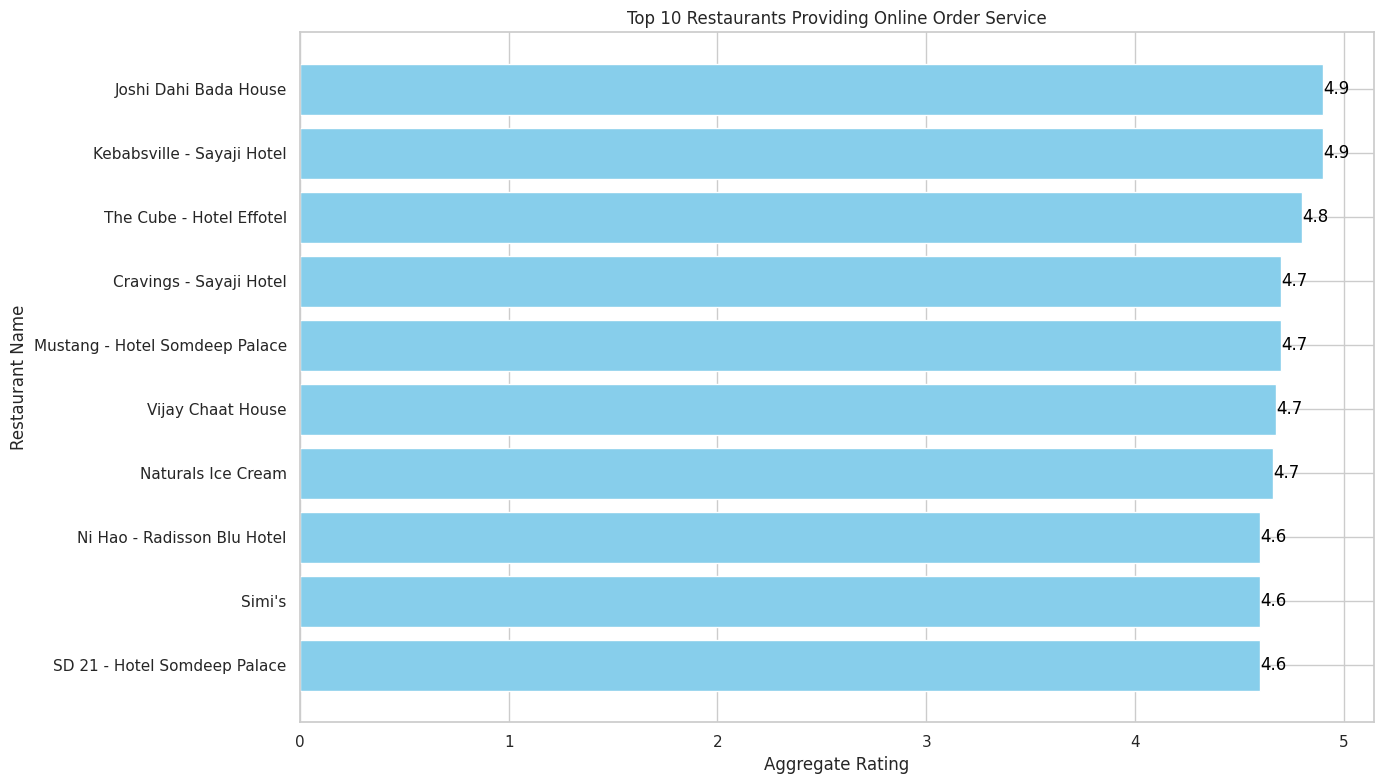

In [ ]:
# Check the distribution of online_order column
print(df_1['online_order'].value_counts())

# Filter the dataset for restaurants providing online order service
online_order_restaurants = df_1[df_1['online_order'] == 'Yes']

# Check the number of restaurants providing online order service
print(f"Number of restaurants providing online order service: {len(online_order_restaurants)}")

# Group by restaurant name and calculate the mean aggregate rating
grouped_online_order_restaurants = online_order_restaurants.groupby('name')['aggregate_rating'].mean().reset_index()

# Sort by aggregate rating in descending order and select the top 10
top_10_online_order_restaurants = grouped_online_order_restaurants.sort_values(by='aggregate_rating', ascending=False).head(10)

# Check the top 10 restaurants
print(top_10_online_order_restaurants)

# Plotting the top 10 restaurants
plt.figure(figsize=(14, 8))
bars = plt.barh(top_10_online_order_restaurants['name'], top_10_online_order_restaurants['aggregate_rating'], color='skyblue')
plt.xlabel('Aggregate Rating')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Restaurants Providing Online Order Service')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rated restaurant at the top
plt.tight_layout()

# Add labels to the bars
for bar in bars:
    plt.text(
        bar.get_width(),  # x-coordinate position
        bar.get_y() + bar.get_height() / 2,  # y-coordinate position
        f'{bar.get_width():.1f}',  # Label with one decimal point
        va='center',  # Centered vertically
        ha='left',  # Centered horizontally
        color='black'  # Text color
    )

plt.show()

How the book table service affects the restaurant rate?

book_table
No     2636
Yes     208
Name: count, dtype: int64
Average rating for restaurants with book table service: 3.91
Average rating for restaurants without book table service: 3.89


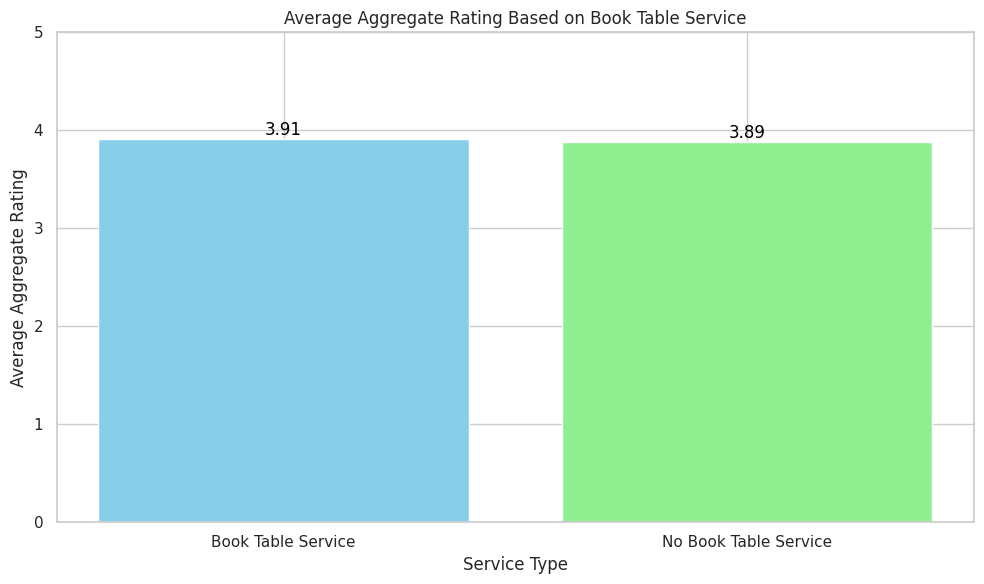

In [ ]:
print(df_1['book_table'].value_counts())

# Calculate the average aggregate rating for restaurants with and without book table service
avg_rating_book_table = df_1[df_1['book_table'] == 'Yes']['aggregate_rating'].mean()
avg_rating_no_book_table = df_1[df_1['book_table'] == 'No']['aggregate_rating'].mean()

# Print the average ratings
print(f"Average rating for restaurants with book table service: {avg_rating_book_table:.2f}")
print(f"Average rating for restaurants without book table service: {avg_rating_no_book_table:.2f}")

# Prepare data for plotting
labels = ['Book Table Service', 'No Book Table Service']
ratings = [avg_rating_book_table, avg_rating_no_book_table]

# Plotting the average ratings
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, ratings, color=['skyblue', 'lightgreen'])
plt.xlabel('Service Type')
plt.ylabel('Average Aggregate Rating')
plt.title('Average Aggregate Rating Based on Book Table Service')
plt.ylim(0, 5)  # Assuming the rating scale is from 0 to 5

# Add labels to the bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate position
        bar.get_height(),  # y-coordinate position
        f'{bar.get_height():.2f}',  # Label with two decimal points
        va='bottom',  # Bottom vertical alignment
        ha='center',  # Centered horizontal alignment
        color='black'  # Text color
    )

plt.tight_layout()
plt.show()

Which are some of the best restaurants providing book_table service??

book_table
No     2636
Yes     208
Name: count, dtype: int64
Number of restaurants providing book table service: 208
                              name  aggregate_rating
1634    Kebabsville - Sayaji Hotel               4.9
3086         Joshi Dahi Bada House               4.9
1040             Vijay Chaat House               4.8
2975       Cravings - Sayaji Hotel               4.7
2793            Naturals Ice Cream               4.7
3142   Ni Hao - Radisson Blu Hotel               4.6
1532  SD 21 - Hotel Somdeep Palace               4.6
2650                Chang's Legacy               4.6
2787         Shreemaya Celebration               4.6
2923       Hobnob Gourmet CafÃ©bar               4.6


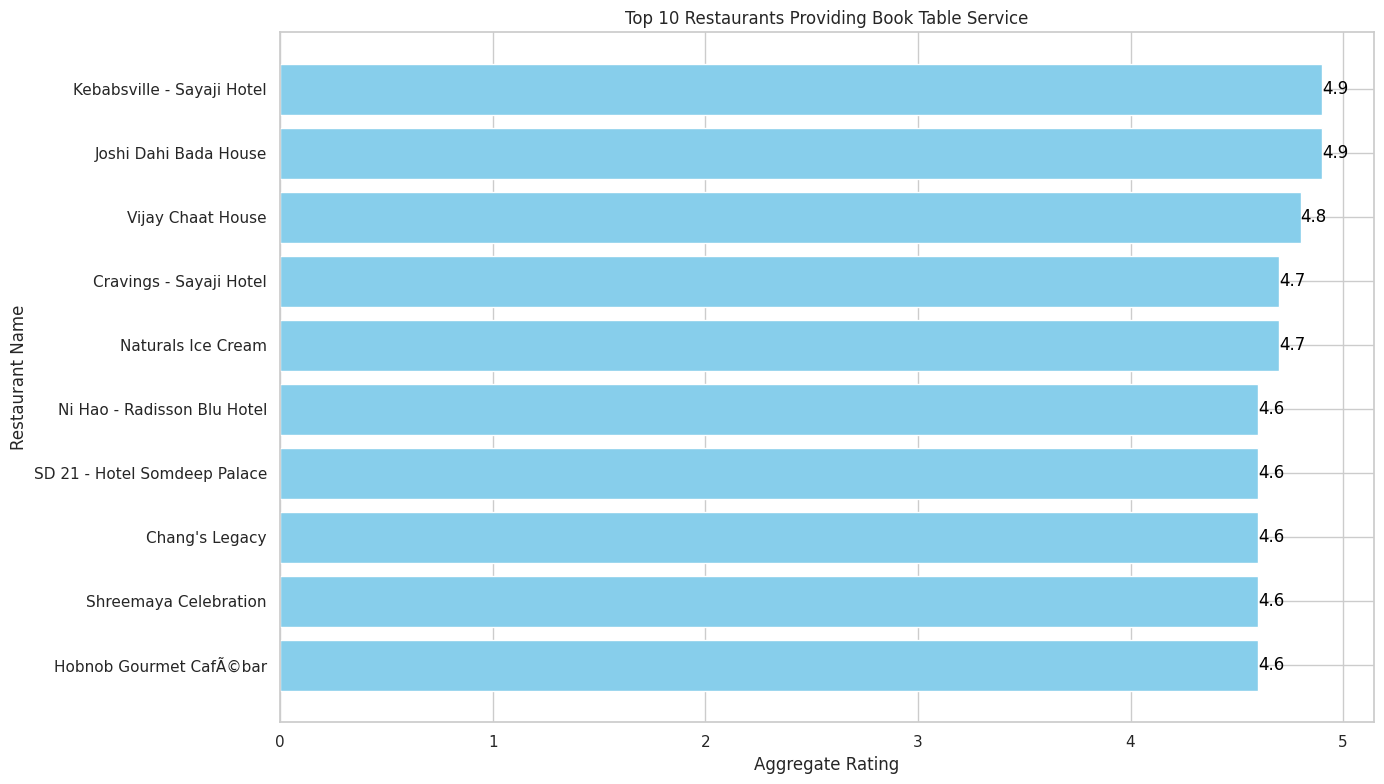

In [ ]:
print(df_1['book_table'].value_counts())

# Filter the dataset for restaurants providing book table service
book_table_restaurants = df_1[df_1['book_table'] == 'Yes']

# Check the number of restaurants providing book table service
print(f"Number of restaurants providing book table service: {len(book_table_restaurants)}")

# Sort by aggregate rating in descending order and select the top 10
top_10_book_table_restaurants = book_table_restaurants.sort_values(by='aggregate_rating', ascending=False).head(10)

# Check the top 10 restaurants
print(top_10_book_table_restaurants[['name', 'aggregate_rating']])

# Plotting the top 10 restaurants
plt.figure(figsize=(14, 8))
bars = plt.barh(top_10_book_table_restaurants['name'], top_10_book_table_restaurants['aggregate_rating'], color='skyblue')
plt.xlabel('Aggregate Rating')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Restaurants Providing Book Table Service')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rated restaurant at the top

# Add labels to the bars
for bar in bars:
    plt.text(
        bar.get_width(),  # x-coordinate position
        bar.get_y() + bar.get_height() / 2,  # y-coordinate position
        f'{bar.get_width():.1f}',  # Label with one decimal point
        va='center',  # Centered vertical alignment
        ha='left',  # Left horizontal alignment
        color='black'  # Text color
    )

plt.tight_layout()
plt.show()

Average Rating according to restaurant service

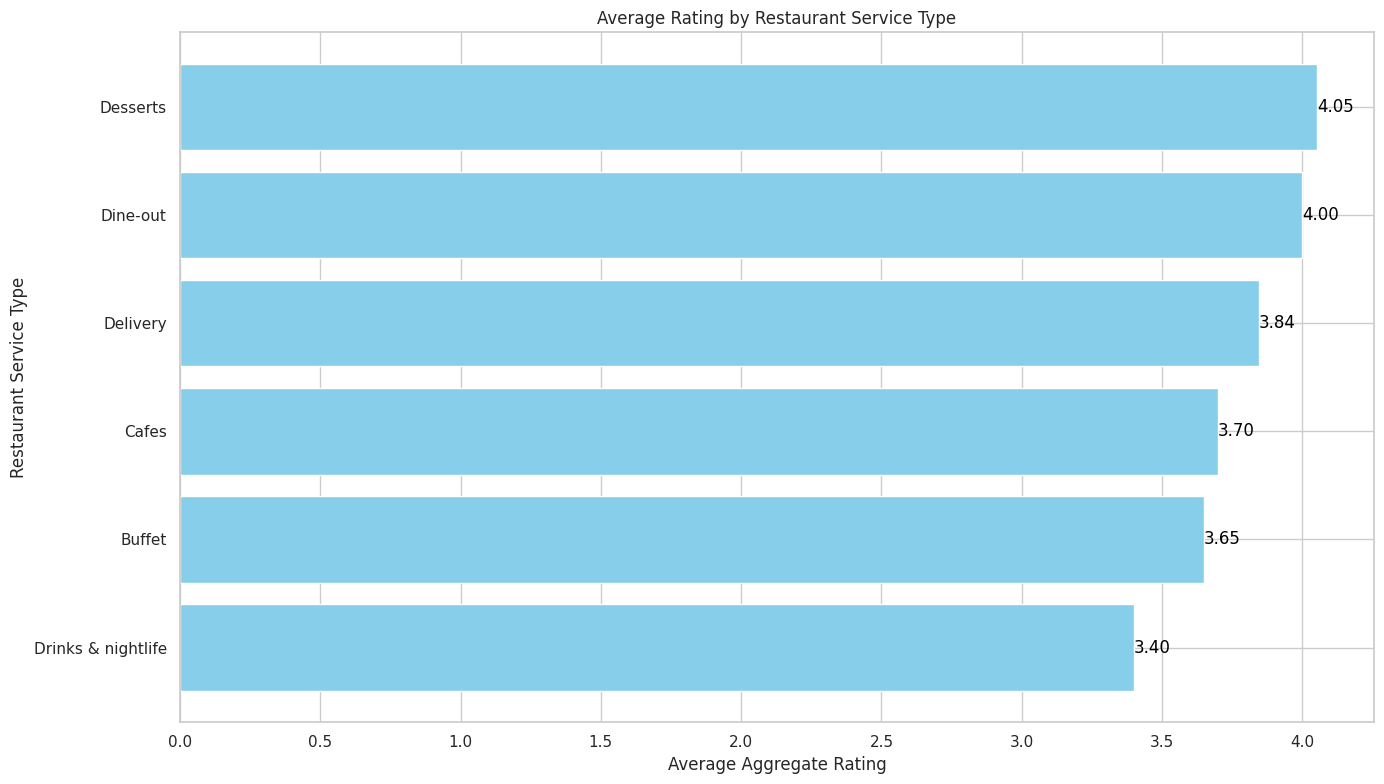

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_1 is your dataset
# Group by 'listed_in(type)' and calculate the average aggregate rating
average_rating_by_service = df_1.groupby('listed_in(type)')['aggregate_rating'].mean().sort_values(ascending=False)

# Plotting the average rating by restaurant service type
plt.figure(figsize=(14, 8))
bars = plt.barh(average_rating_by_service.index, average_rating_by_service.values, color='skyblue')
plt.xlabel('Average Aggregate Rating')
plt.ylabel('Restaurant Service Type')
plt.title('Average Rating by Restaurant Service Type')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rated service type at the top

# Add labels to the bars
for bar in bars:
    plt.text(
        bar.get_width(),  # x-coordinate position
        bar.get_y() + bar.get_height() / 2,  # y-coordinate position
        f'{bar.get_width():.2f}',  # Label with two decimal points
        va='center',  # Centered vertical alignment
        ha='left',  # Left horizontal alignment
        color='black'  # Text color
    )

plt.tight_layout()
plt.show()


Characteristics of restaurants with book_table service

Average Cost for Two: 630.53
Average Aggregate Rating: 3.91
Average Number of Votes: 570.69


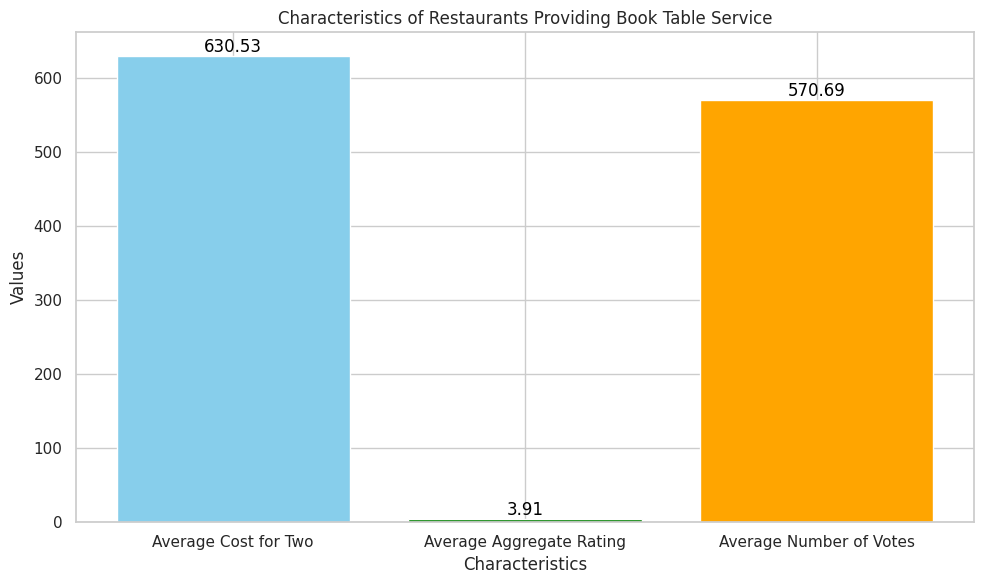

<ipython-input-36-05cbd34c259e>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating_text', data=book_table_restaurants, palette='viridis', order=rating_text_distribution.index)


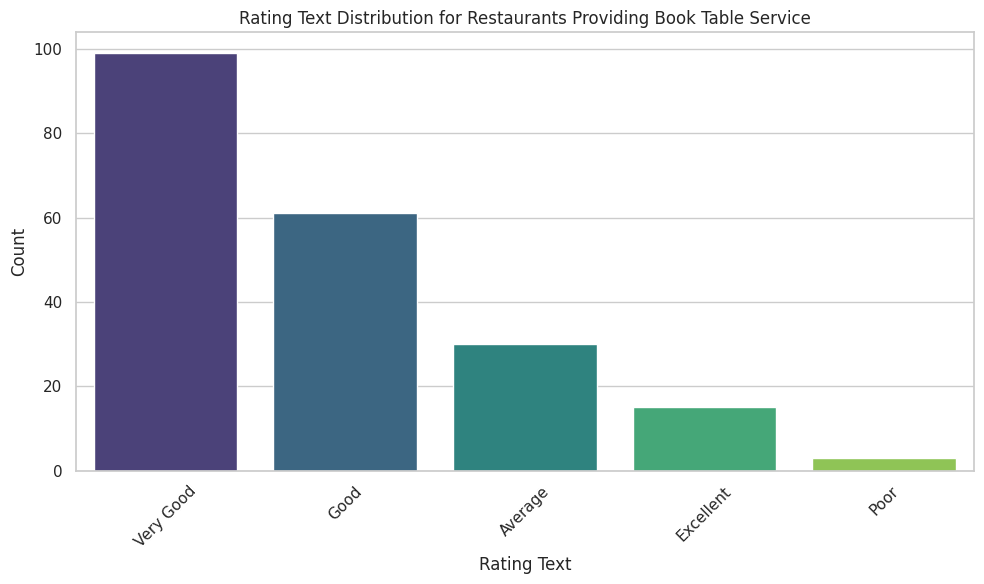

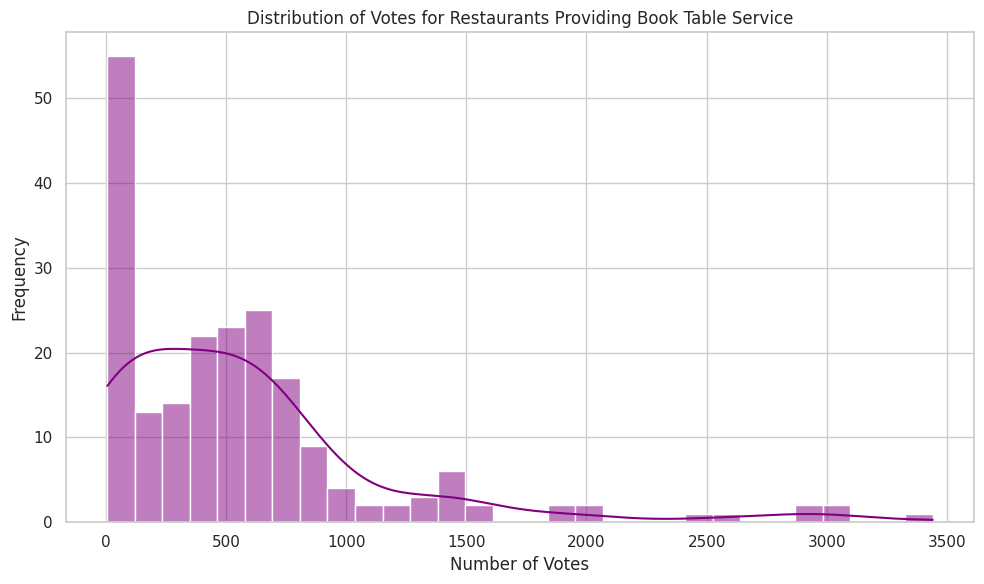

In [ ]:
book_table_restaurants = df_1[df_1['book_table'] == 'Yes']

# Calculate characteristics
average_cost = book_table_restaurants['average_cost_for_two'].mean()
average_rating = book_table_restaurants['aggregate_rating'].mean()
average_votes = book_table_restaurants['votes'].mean()

# Print characteristics
print(f"Average Cost for Two: {average_cost:.2f}")
print(f"Average Aggregate Rating: {average_rating:.2f}")
print(f"Average Number of Votes: {average_votes:.2f}")

# Plotting the characteristics
characteristics = {
    'Average Cost for Two': average_cost,
    'Average Aggregate Rating': average_rating,
    'Average Number of Votes': average_votes
}

plt.figure(figsize=(10, 6))
bars = plt.bar(characteristics.keys(), characteristics.values(), color=['skyblue', 'green', 'orange'])
plt.xlabel('Characteristics')
plt.ylabel('Values')
plt.title('Characteristics of Restaurants Providing Book Table Service')

# Add labels to the bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate position
        bar.get_height(),  # y-coordinate position
        f'{bar.get_height():.2f}',  # Label with two decimal points
        ha='center',  # Centered horizontal alignment
        va='bottom',  # Bottom vertical alignment
        color='black'  # Text color
    )

plt.tight_layout()
plt.show()

# Rating text distribution
rating_text_distribution = book_table_restaurants['rating_text'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x='rating_text', data=book_table_restaurants, palette='viridis', order=rating_text_distribution.index)
plt.xlabel('Rating Text')
plt.ylabel('Count')
plt.title('Rating Text Distribution for Restaurants Providing Book Table Service')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of votes
plt.figure(figsize=(10, 6))
sns.histplot(book_table_restaurants['votes'], bins=30, kde=True, color='purple')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.title('Distribution of Votes for Restaurants Providing Book Table Service')
plt.tight_layout()
plt.show()

Characteristics of restuarants with online_order service

Average Cost for Two: 655.46
Average Aggregate Rating: 3.85
Average Number of Votes: 491.74


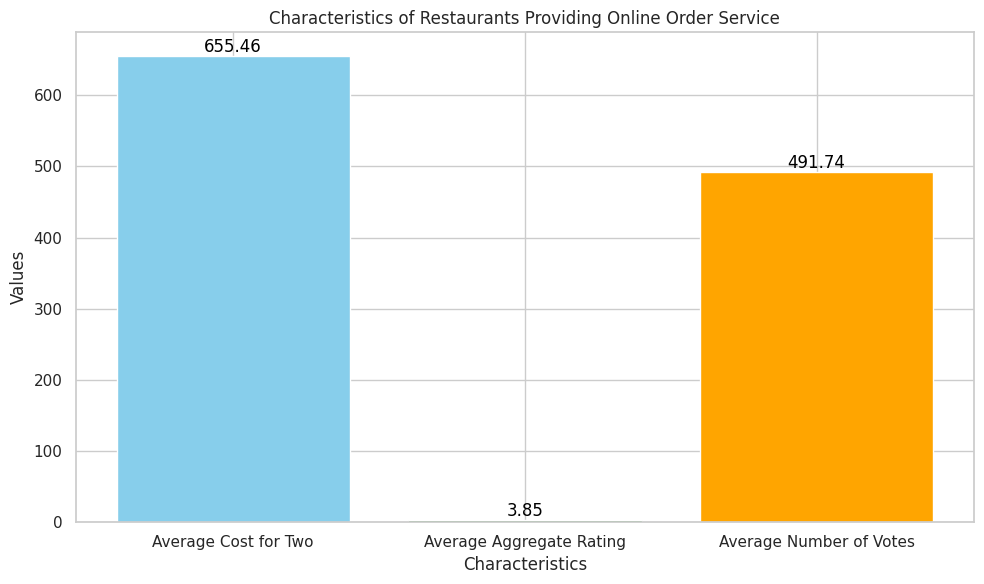

<ipython-input-37-966f1e5f0538>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating_text', data=online_order_restaurants, palette='viridis', order=rating_text_distribution.index)


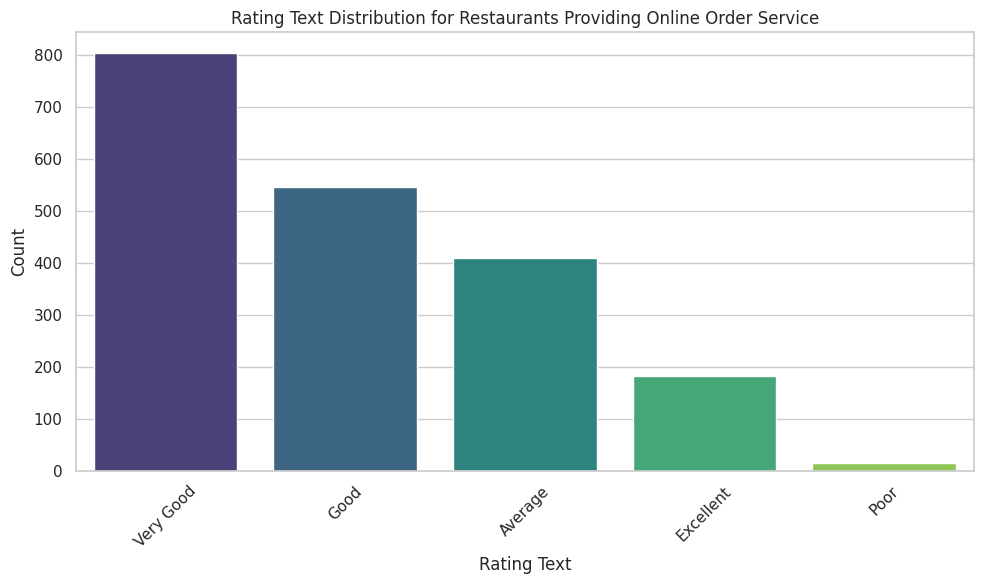

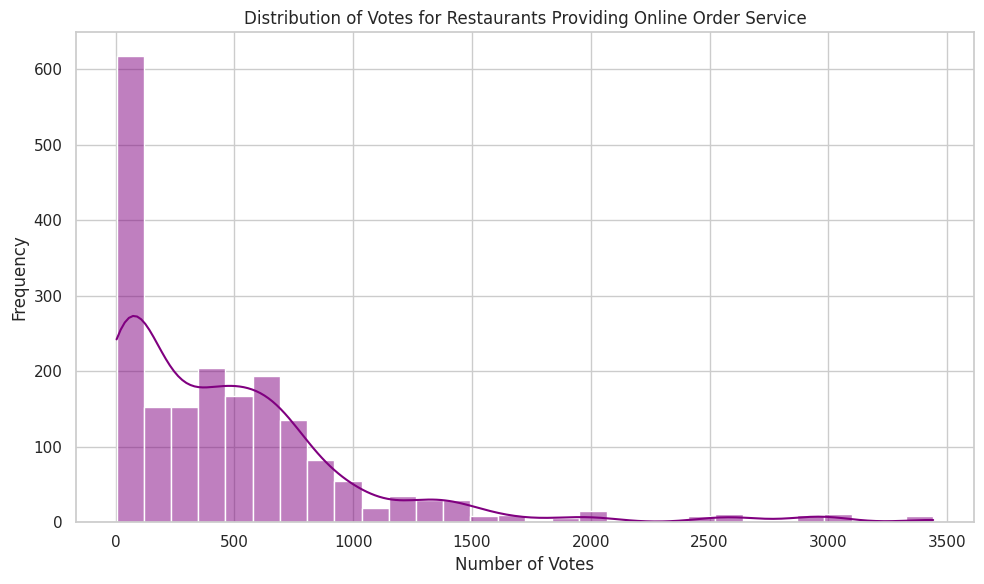

In [ ]:
# Filter the dataset for restaurants providing online order service
online_order_restaurants = df_1[df_1['online_order'] == 'Yes']

# Calculate characteristics
average_cost = online_order_restaurants['average_cost_for_two'].mean()
average_rating = online_order_restaurants['aggregate_rating'].mean()
average_votes = online_order_restaurants['votes'].mean()

# Print characteristics
print(f"Average Cost for Two: {average_cost:.2f}")
print(f"Average Aggregate Rating: {average_rating:.2f}")
print(f"Average Number of Votes: {average_votes:.2f}")

# Plotting the characteristics
characteristics = {
    'Average Cost for Two': average_cost,
    'Average Aggregate Rating': average_rating,
    'Average Number of Votes': average_votes
}

plt.figure(figsize=(10, 6))
bars = plt.bar(characteristics.keys(), characteristics.values(), color=['skyblue', 'green', 'orange'])
plt.xlabel('Characteristics')
plt.ylabel('Values')
plt.title('Characteristics of Restaurants Providing Online Order Service')

# Add labels to the bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate position
        bar.get_height(),  # y-coordinate position
        f'{bar.get_height():.2f}',  # Label with two decimal points
        ha='center',  # Centered horizontal alignment
        va='bottom',  # Bottom vertical alignment
        color='black'  # Text color
    )

plt.tight_layout()
plt.show()

# Rating text distribution
rating_text_distribution = online_order_restaurants['rating_text'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x='rating_text', data=online_order_restaurants, palette='viridis', order=rating_text_distribution.index)
plt.xlabel('Rating Text')
plt.ylabel('Count')
plt.title('Rating Text Distribution for Restaurants Providing Online Order Service')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of votes
plt.figure(figsize=(10, 6))
sns.histplot(online_order_restaurants['votes'], bins=30, kde=True, color='purple')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.title('Distribution of Votes for Restaurants Providing Online Order Service')
plt.tight_layout()
plt.show()


What is the relation between cost and neighbouhood?

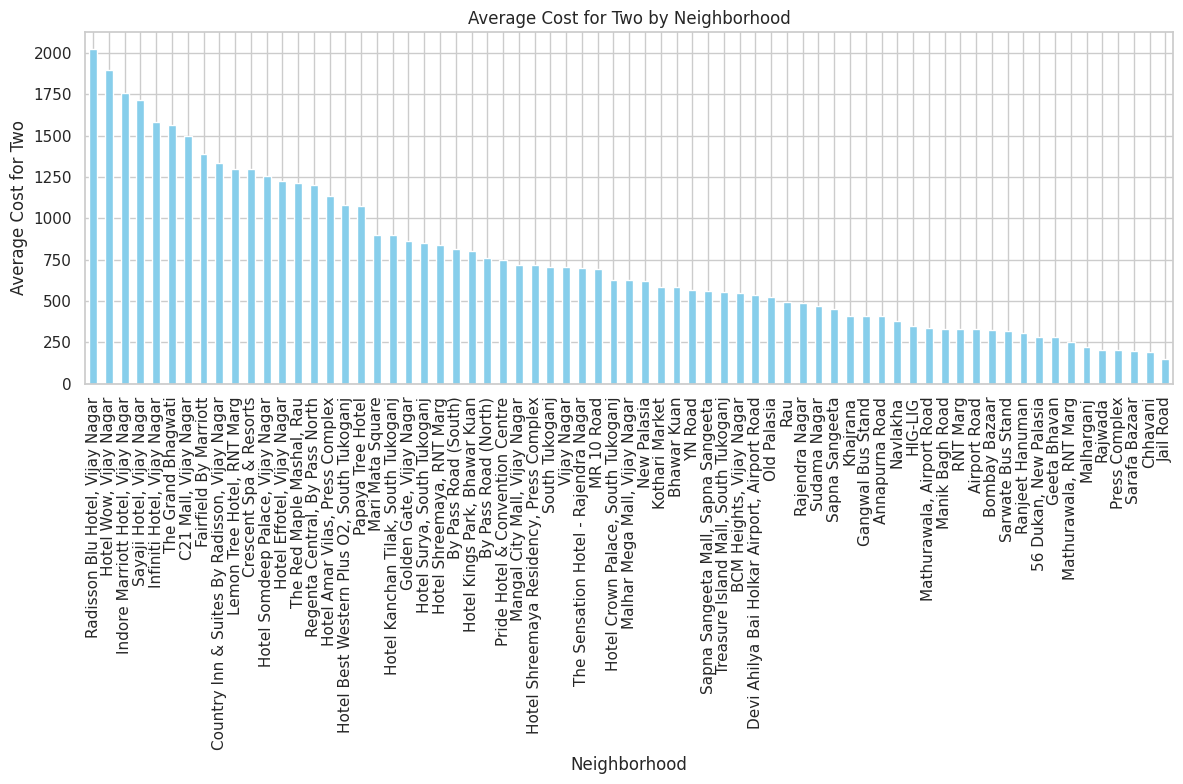

In [ ]:
# Calculate the average cost for two in each neighborhood
average_cost_by_neighborhood = df_1.groupby('locality')['average_cost_for_two'].mean().sort_values(ascending=False)

# Plotting the average cost by neighborhood
plt.figure(figsize=(12, 8))
average_cost_by_neighborhood.plot(kind='bar', color='skyblue')
plt.title('Average Cost for Two by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Cost for Two')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


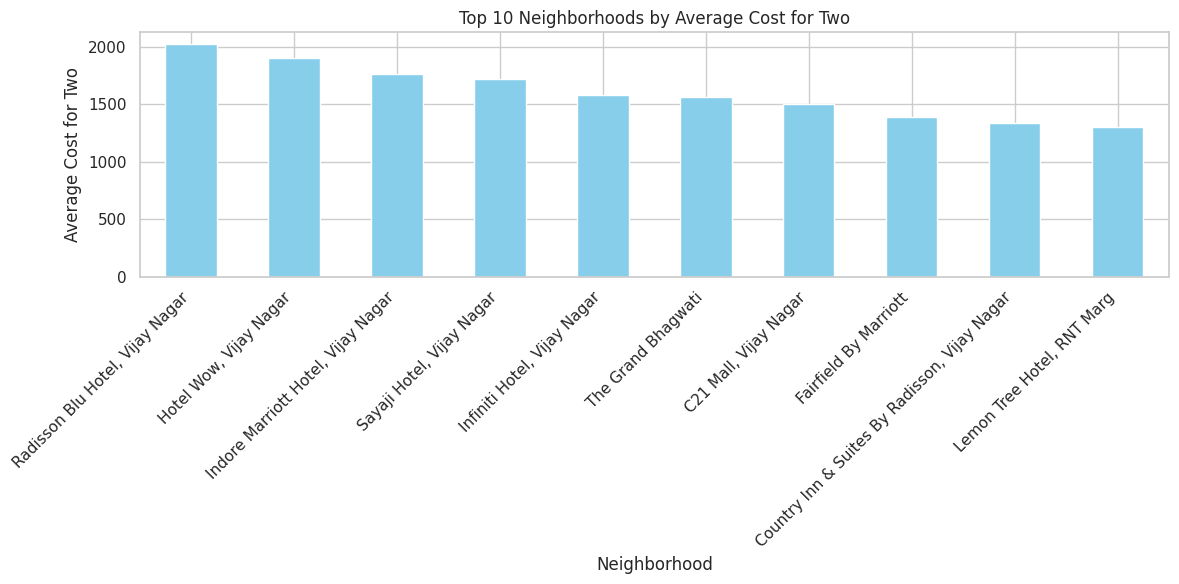

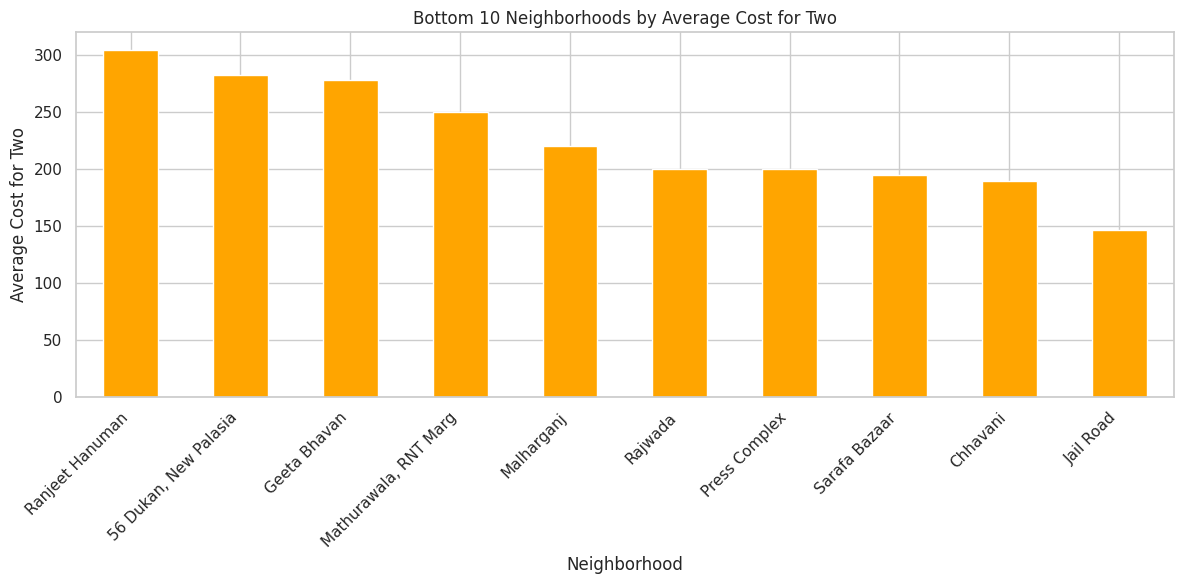

In [ ]:
# Calculate the average cost for two in each neighborhood
average_cost_by_neighborhood = df_1.groupby('locality')['average_cost_for_two'].mean().sort_values(ascending=False)

# Select the top 10 and bottom 10 neighborhoods
top_10_neighborhoods = average_cost_by_neighborhood.head(10)
bottom_10_neighborhoods = average_cost_by_neighborhood.tail(10)

# Plotting the top 10 neighborhoods
plt.figure(figsize=(12, 6))
top_10_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighborhoods by Average Cost for Two')
plt.xlabel('Neighborhood')
plt.ylabel('Average Cost for Two')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the bottom 10 neighborhoods
plt.figure(figsize=(12, 6))
bottom_10_neighborhoods.plot(kind='bar', color='orange')
plt.title('Bottom 10 Neighborhoods by Average Cost for Two')
plt.xlabel('Neighborhood')
plt.ylabel('Average Cost for Two')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


What is the relation between votes and neighbouhood?

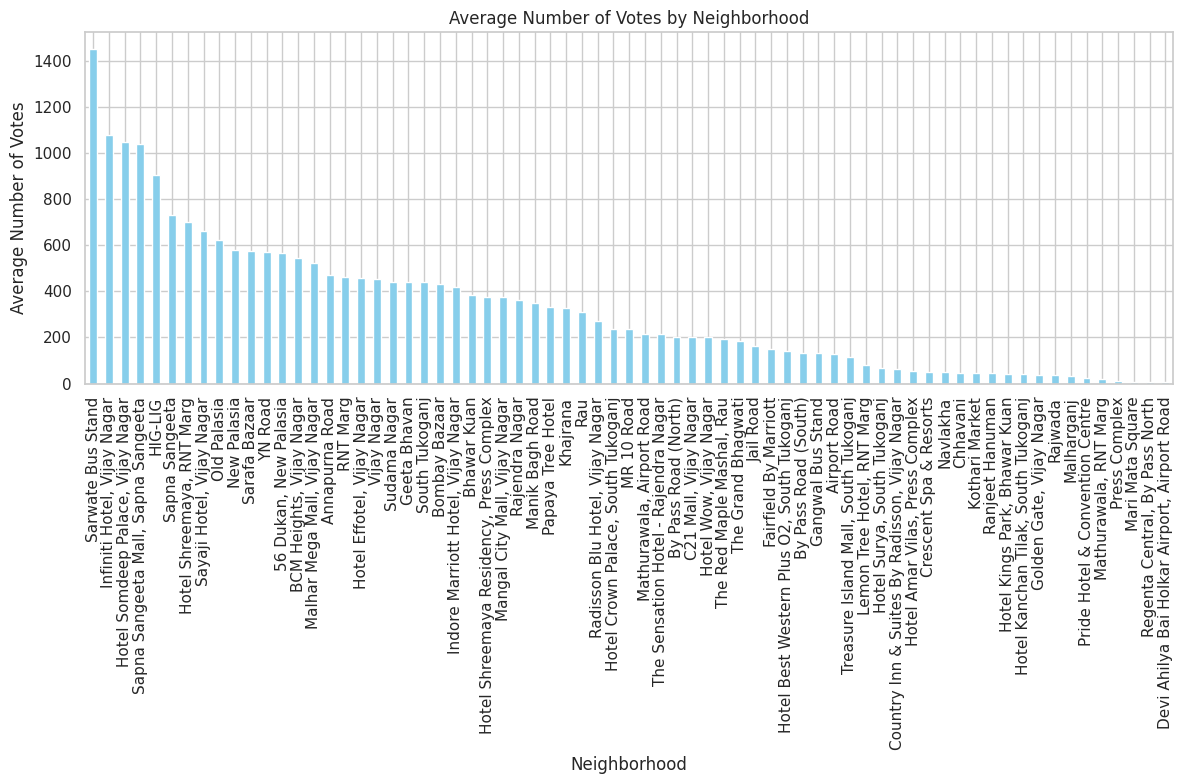

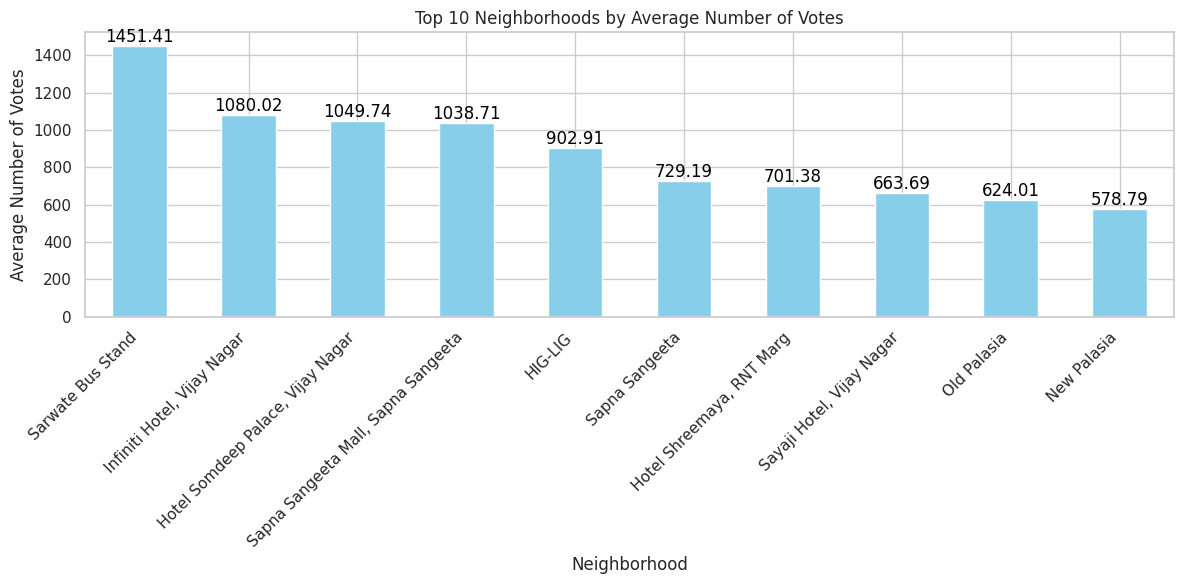

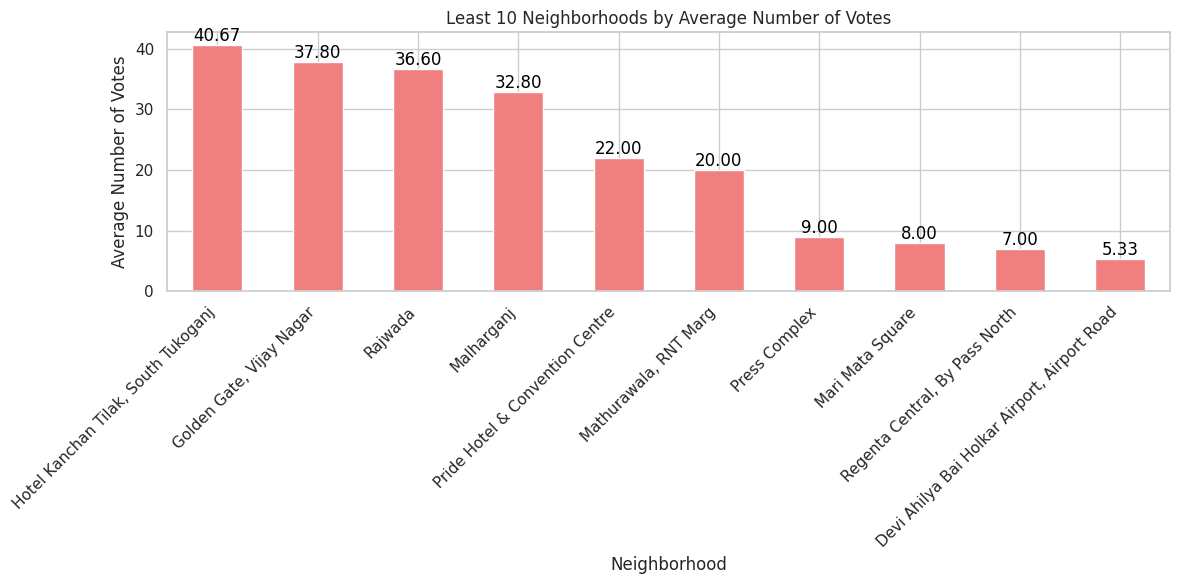

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_1 is your dataset
# Calculate the average number of votes in each neighborhood
neighborhood_votes = df_1.groupby('locality')['votes'].mean().sort_values(ascending=False)

# Plotting the average number of votes by neighborhood
plt.figure(figsize=(12, 8))
neighborhood_votes.plot(kind='bar', color='skyblue')
plt.title('Average Number of Votes by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Number of Votes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Get the top 10 neighborhoods by average number of votes
top_10_neighborhoods_votes = neighborhood_votes.head(10)

# Get the least 10 neighborhoods by average number of votes
least_10_neighborhoods_votes = neighborhood_votes.tail(10)

# Plotting the top 10 neighborhoods with labels
plt.figure(figsize=(12, 6))
bars = top_10_neighborhoods_votes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighborhoods by Average Number of Votes')
plt.xlabel('Neighborhood')
plt.ylabel('Average Number of Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add labels to the bars
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate position
        bar.get_height(),  # y-coordinate position
        f'{bar.get_height():.2f}',  # Label with two decimal points
        ha='center',  # Centered horizontal alignment
        va='bottom',  # Bottom vertical alignment
        color='black'  # Text color
    )

plt.show()

# Plotting the least 10 neighborhoods with labels
plt.figure(figsize=(12, 6))
bars = least_10_neighborhoods_votes.plot(kind='bar', color='lightcoral')
plt.title('Least 10 Neighborhoods by Average Number of Votes')
plt.xlabel('Neighborhood')
plt.ylabel('Average Number of Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add labels to the bars
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate position
        bar.get_height(),  # y-coordinate position
        f'{bar.get_height():.2f}',  # Label with two decimal points
        ha='center',  # Centered horizontal alignment
        va='bottom',  # Bottom vertical alignment
        color='black'  # Text color
    )

plt.show()


The relation between meal_type and locality

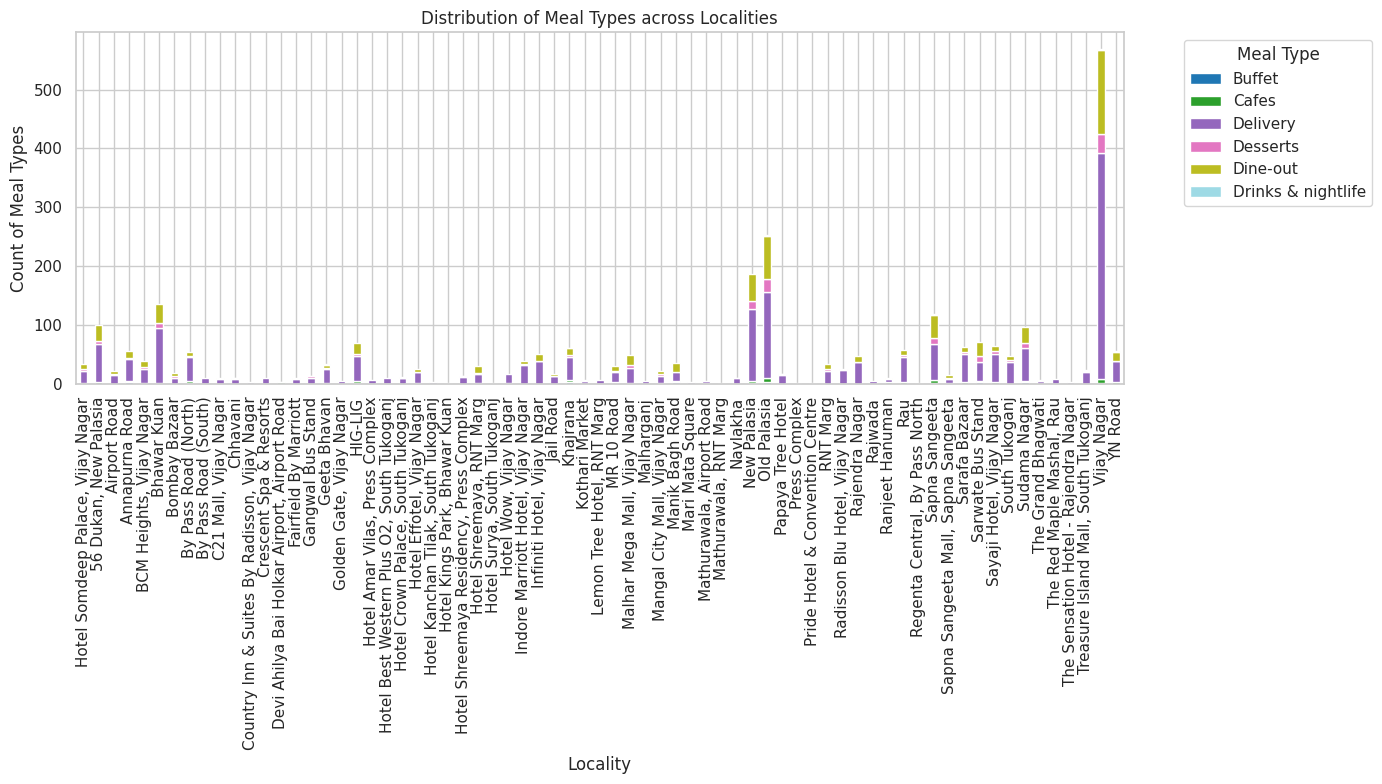

In [ ]:
meal_type_locality_crosstab = pd.crosstab(df_1['locality'], df_1['listed_in(type)'])

# Plotting the crosstab as a stacked bar chart
meal_type_locality_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Distribution of Meal Types across Localities')
plt.xlabel('Locality')
plt.ylabel('Count of Meal Types')
plt.xticks(rotation=90)
plt.legend(title='Meal Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Relation between meal type and the rating

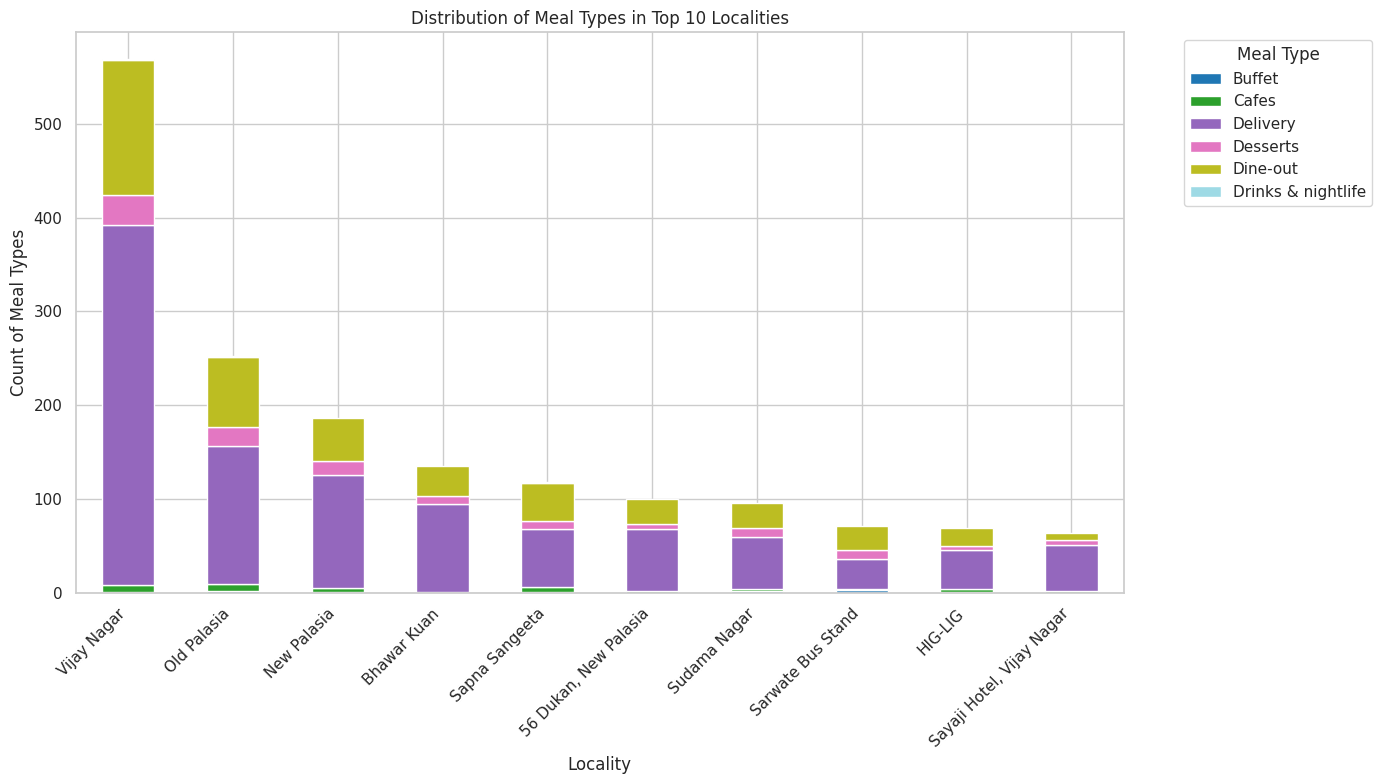

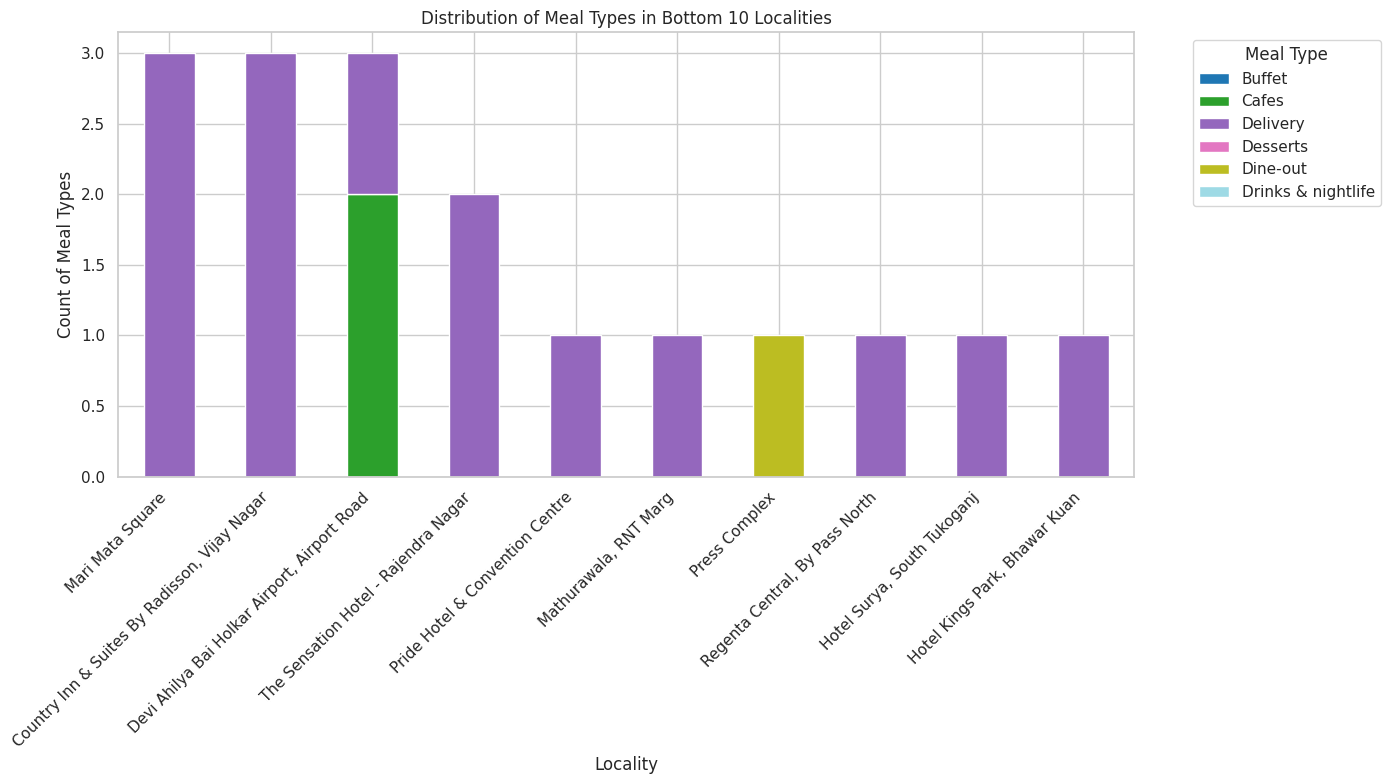

In [ ]:
meal_type_locality_crosstab = pd.crosstab(df_1['locality'], df_1['listed_in(type)'])

# Calculate the total count of meal types per locality
total_counts_per_locality = meal_type_locality_crosstab.sum(axis=1)

# Sort localities based on the total counts
sorted_localities = total_counts_per_locality.sort_values(ascending=False)

# Select top 10 and bottom 10 localities
top_10_localities = sorted_localities.head(10).index
bottom_10_localities = sorted_localities.tail(10).index

# Filter the crosstab for these localities
top_10_crosstab = meal_type_locality_crosstab.loc[top_10_localities]
bottom_10_crosstab = meal_type_locality_crosstab.loc[bottom_10_localities]

# Plotting the top 10 localities
plt.figure(figsize=(14, 8))
top_10_crosstab.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())
plt.title('Distribution of Meal Types in Top 10 Localities')
plt.xlabel('Locality')
plt.ylabel('Count of Meal Types')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Meal Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting the bottom 10 localities
plt.figure(figsize=(14, 8))
bottom_10_crosstab.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())
plt.title('Distribution of Meal Types in Bottom 10 Localities')
plt.xlabel('Locality')
plt.ylabel('Count of Meal Types')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Meal Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Best rated, most voted restaurants, irrespective of cost

                   name   votes  aggregate_rating
2002   Hotel Guru Kripa  3441.0               4.3
2113  Nafees Restaurant  2987.0               4.3
2446        Apna Sweets  2619.0               4.3
2213    Shree Gurukripa  2030.0               4.3
1538        99 Rotiwala  2517.0               4.2
2454        Sagar Gaire  2932.0               4.1
1631      Hotel Rajhans  1972.0               4.0


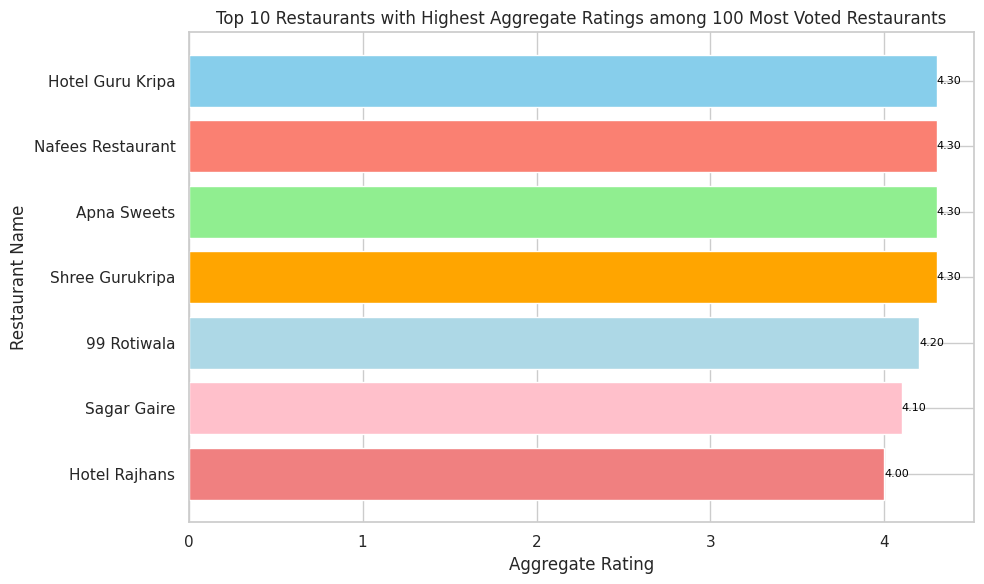

In [ ]:
most_voted_restaurants = df_1.sort_values(by='votes', ascending=False)

# From these, select the top 100 most voted restaurants for better aggregation
top_voted_restaurants = most_voted_restaurants.head(100)

# Remove duplicate entries based on the 'name' column
top_voted_restaurants = top_voted_restaurants.drop_duplicates(subset='name')

# From these top voted restaurants, sort by aggregate rating in descending order
top_rated_restaurants = top_voted_restaurants.sort_values(by='aggregate_rating', ascending=False).head(10)

# Print the details of the top 10 restaurants
top_rated_restaurants_result = top_rated_restaurants[['name', 'votes', 'aggregate_rating']]
print(top_rated_restaurants_result)

# Plot the top 10 restaurants with their aggregate ratings
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightblue', 'pink', 'lightcoral', 'yellow', 'lightseagreen', 'violet']
bars = plt.barh(top_rated_restaurants['name'], top_rated_restaurants['aggregate_rating'], color=colors)
plt.xlabel('Aggregate Rating')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Restaurants with Highest Aggregate Ratings among 100 Most Voted Restaurants')

# Add bar labels
for bar in bars:
    plt.text(
        bar.get_width(),  # x-coordinate position
        bar.get_y() + bar.get_height() / 2,  # y-coordinate position
        f'{bar.get_width():.2f}',  # Label with two decimal points
        va='center',  # Centered vertical alignment
        ha='left',  # Left horizontal alignment
        fontsize=8,  # Font size
        color='black'  # Text color
    )

plt.gca().invert_yaxis()  # Invert y-axis to have the highest rated restaurant at the top
plt.tight_layout()
plt.show()

Top Localities of Restaraunts in Indore

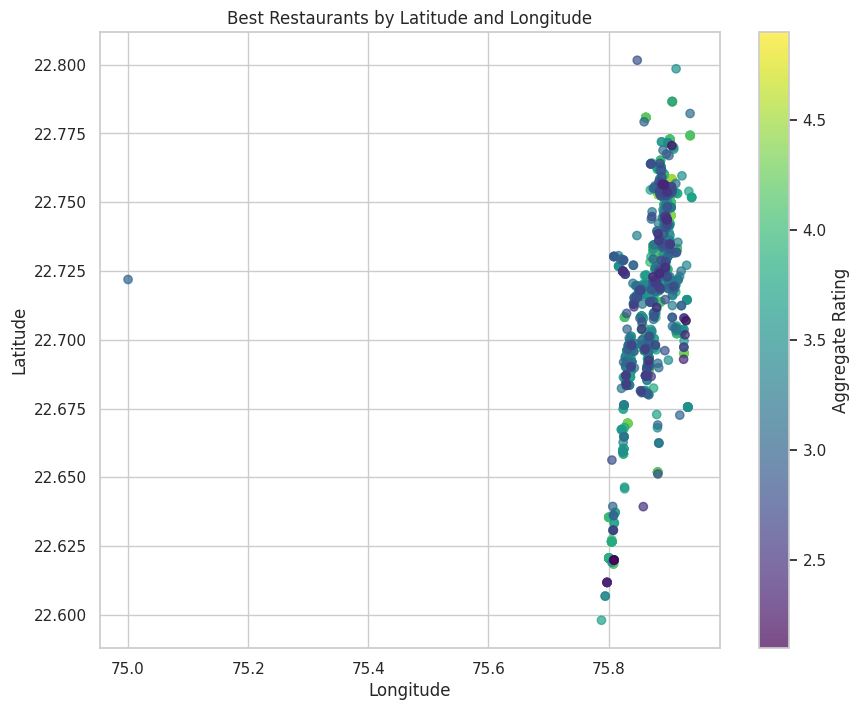

In [ ]:
best_restaurants = df_1.sort_values(by='aggregate_rating', ascending=False)

# Plotting the best restaurants based on latitude and longitude
plt.figure(figsize=(10, 8))
plt.scatter(best_restaurants['longitude'], best_restaurants['latitude'], c=best_restaurants['aggregate_rating'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Aggregate Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Best Restaurants by Latitude and Longitude')
plt.grid(True)
plt.show()

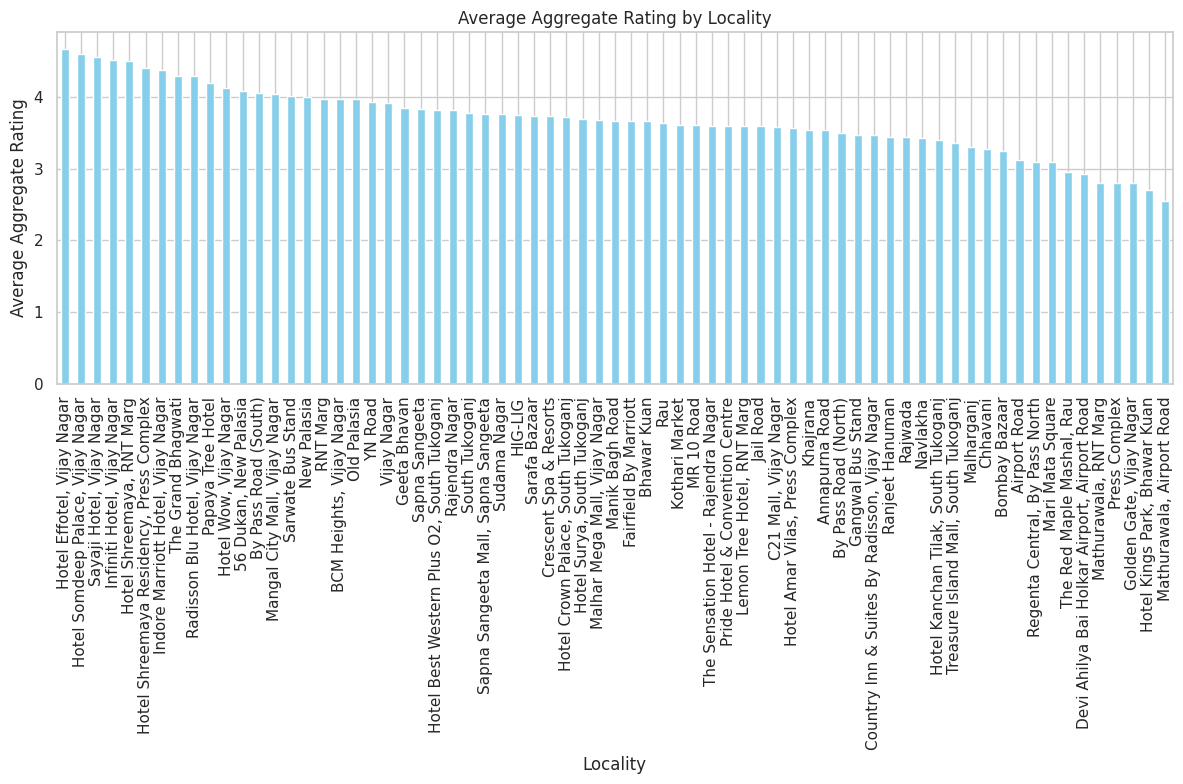

In [ ]:
avg_rating_by_locality = df_1.groupby('locality')['aggregate_rating'].mean().sort_values(ascending=False)

# Plotting the average aggregate rating by locality
plt.figure(figsize=(12, 8))
avg_rating_by_locality.plot(kind='bar', color='skyblue')
plt.title('Average Aggregate Rating by Locality')
plt.xlabel('Locality')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Top Restaraunt Chains in Indore

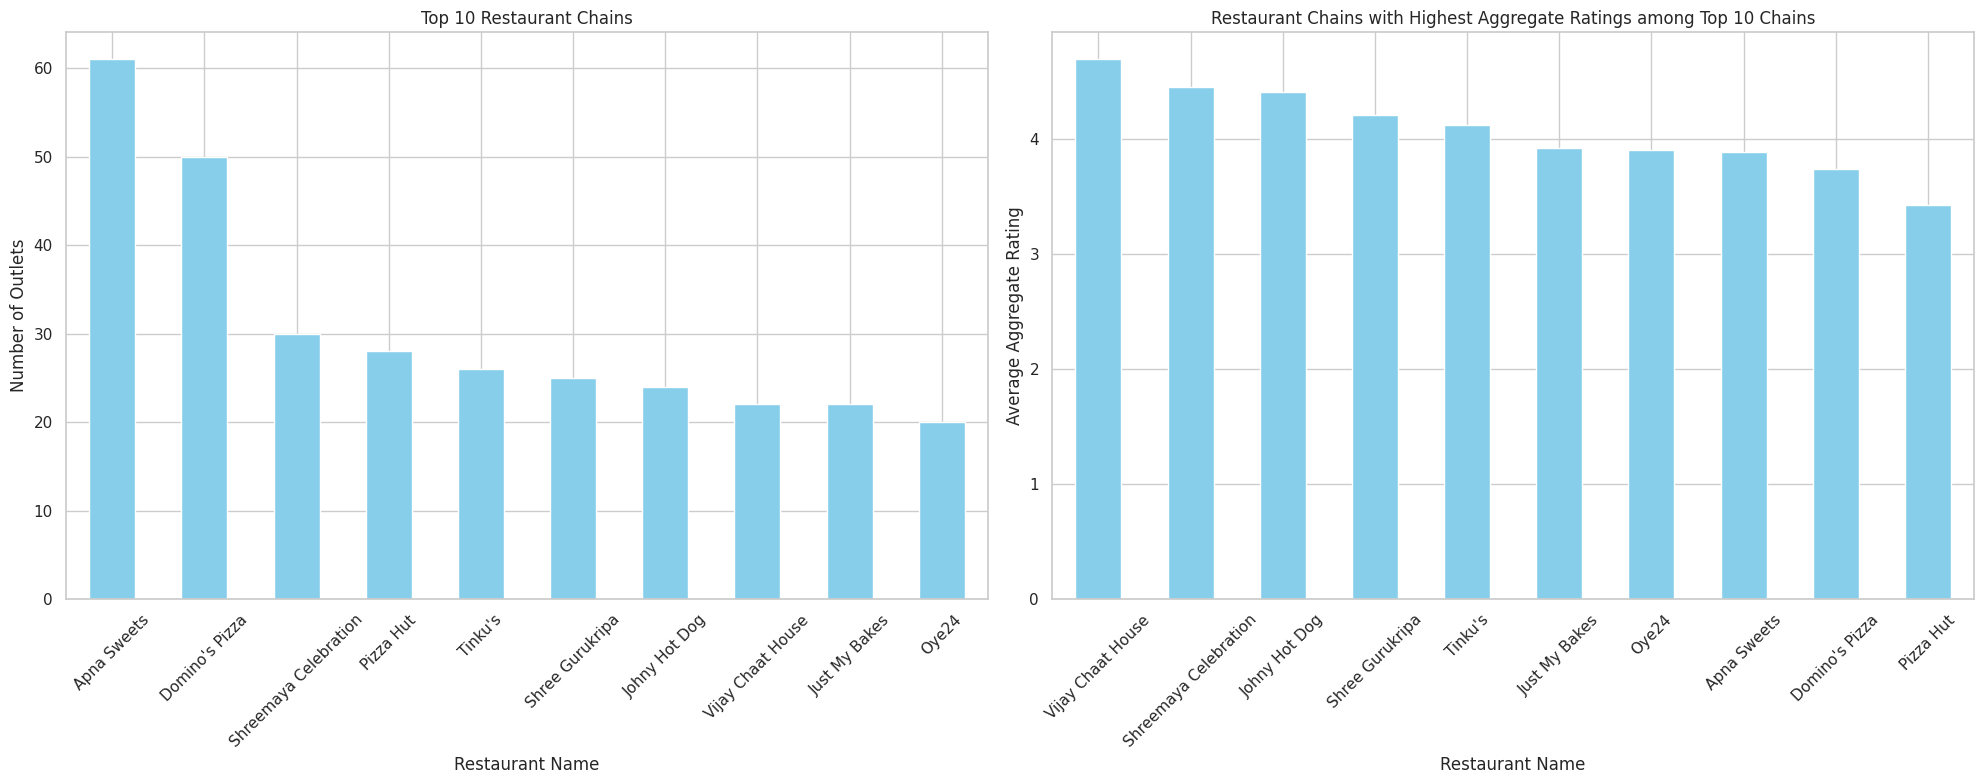

In [ ]:
restaurant_chain_counts = df_1['name'].value_counts().head(10)

# Group by restaurant name and count the number of occurrences to get the top 10 restaurant chains
top_10_chains = df_1['name'].value_counts().head(10).index

# Filter the dataset to include only the top 10 chains
top_10_chains_df = df_1[df_1['name'].isin(top_10_chains)]

# Calculate the mean aggregate rating for each restaurant chain
top_10_chains_avg_rating = top_10_chains_df.groupby('name')['aggregate_rating'].mean().sort_values(ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the top 10 restaurant chains
restaurant_chain_counts.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Top 10 Restaurant Chains')
axes[0].set_xlabel('Restaurant Name')
axes[0].set_ylabel('Number of Outlets')
axes[0].set_xticklabels(restaurant_chain_counts.index, rotation=45)

# Plotting the restaurant chains with their aggregate ratings
top_10_chains_avg_rating.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('Restaurant Chains with Highest Aggregate Ratings among Top 10 Chains')
axes[1].set_xlabel('Restaurant Name')
axes[1].set_ylabel('Average Aggregate Rating')
axes[1].set_xticklabels(top_10_chains_avg_rating.index, rotation=45)

plt.tight_layout()
plt.show()

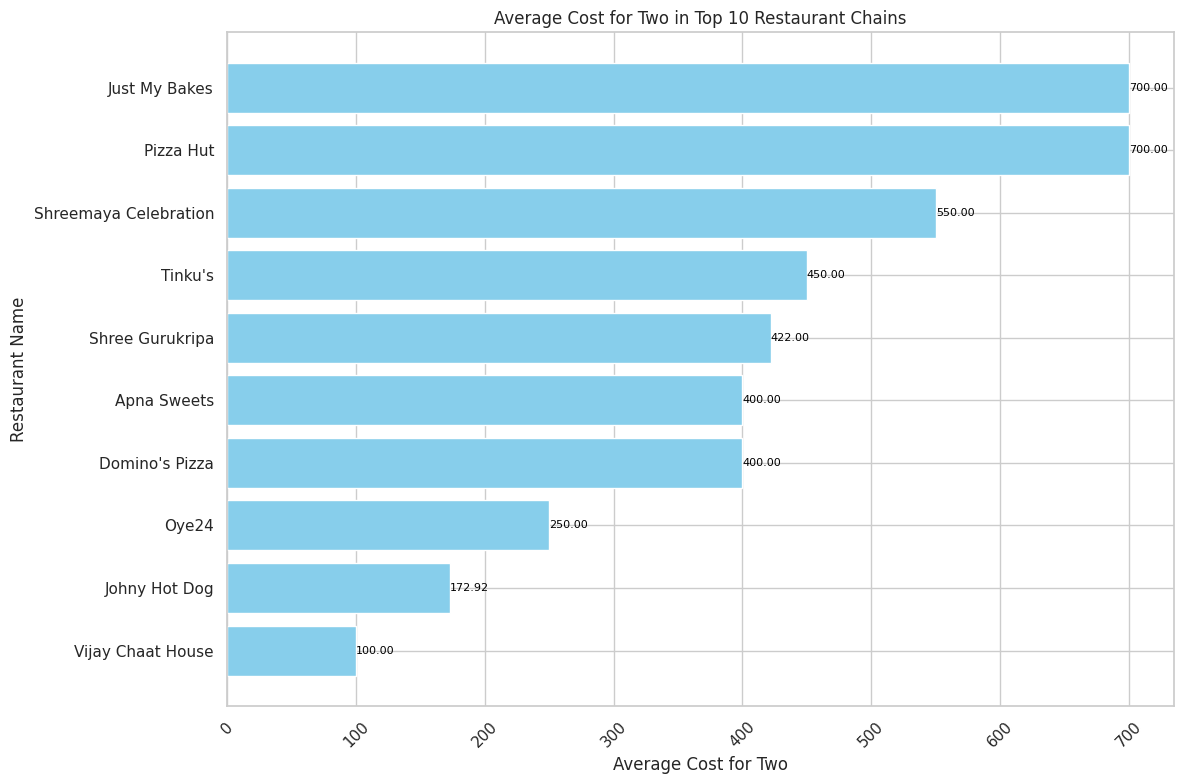

In [ ]:
# Group by restaurant name and count the number of occurrences to get the top 10 restaurant chains
top_10_chains = df_1['name'].value_counts().head(10).index

# Filter the dataset to include only the top 10 chains
top_10_chains_df = df_1[df_1['name'].isin(top_10_chains)]

# Calculate the average cost for two for each restaurant chain
top_10_chains_avg_cost = top_10_chains_df.groupby('name')['average_cost_for_two'].mean().sort_values(ascending=False)

# Plotting the average cost for two for the top 10 restaurant chains
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_chains_avg_cost.index, top_10_chains_avg_cost.values, color='skyblue')
plt.title('Average Cost for Two in Top 10 Restaurant Chains')
plt.xlabel('Average Cost for Two')
plt.ylabel('Restaurant Name')
plt.xticks(rotation=45)

# Add bar labels
for bar in bars:
    plt.text(
        bar.get_width(),  # x-coordinate position
        bar.get_y() + bar.get_height() / 2,  # y-coordinate position
        f'{bar.get_width():.2f}',  # Label with two decimal points
        va='center',  # Centered vertical alignment
        ha='left',  # Left horizontal alignment
        fontsize=8,  # Font size
        color='black'  # Text color
    )

plt.gca().invert_yaxis()  # Invert y-axis to have the highest rated restaurant at the top
plt.tight_layout()
plt.show()

Best Dessert Parlours in Indore

                                name  aggregate_rating
580            Joshi Dahi Bada House               4.9
2234      Kebabsville - Sayaji Hotel               4.9
2229        The Cube - Hotel Effotel               4.8
2149  Mustang - Hotel Somdeep Palace               4.7
2226         Cravings - Sayaji Hotel               4.7
2224    SD 21 - Hotel Somdeep Palace               4.6
2236           Shreemaya Celebration               4.6
574                           Simi's               4.6
2165                  Chang's Legacy               4.6
614                     South Avenue               4.5


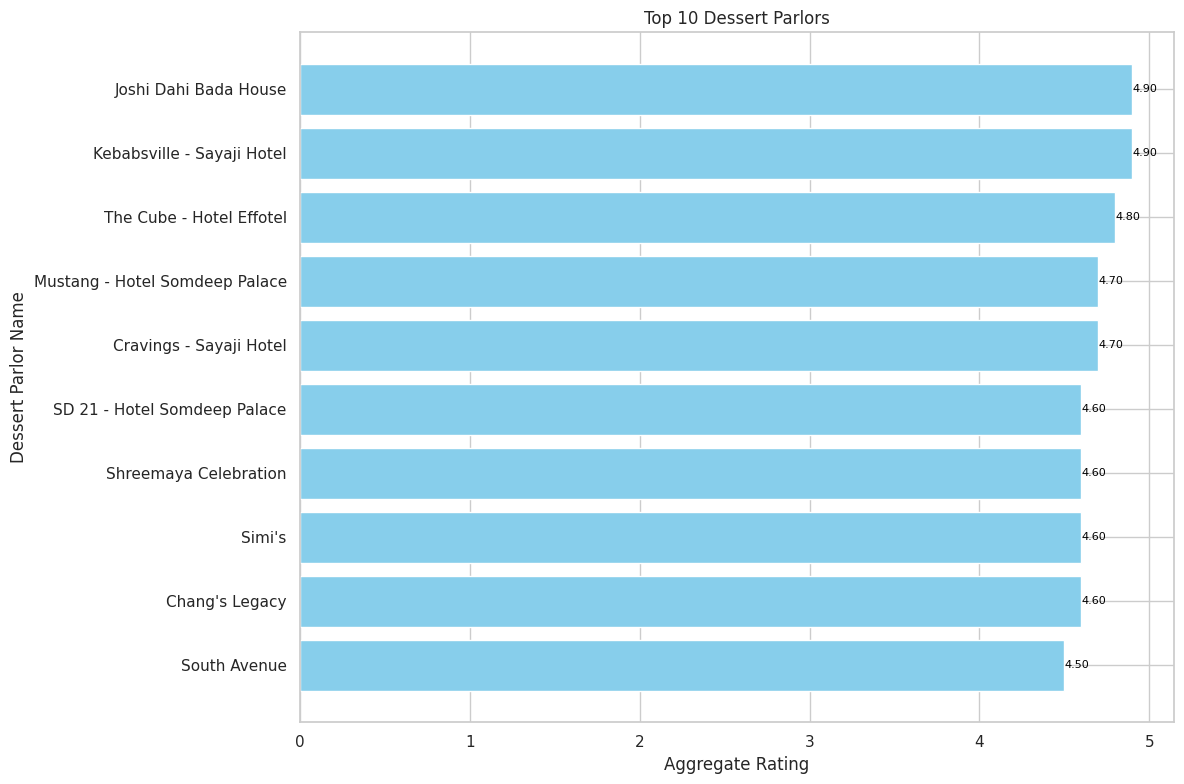

In [ ]:
# Filter the dataset for dessert parlors
dessert_parlors = df_1[df_1['listed_in(type)'].str.contains('Desserts', na=False)]

# Remove duplicate entries based on the 'name' column
dessert_parlors = dessert_parlors.drop_duplicates(subset='name')

# Sort by aggregate rating in descending order and select the top 10
top_dessert_parlors = dessert_parlors.sort_values(by='aggregate_rating', ascending=False).head(10)

# Print the top dessert parlors
print(top_dessert_parlors[['name', 'aggregate_rating']])

# Plotting the top dessert parlors
plt.figure(figsize=(12, 8))
bars = plt.barh(top_dessert_parlors['name'], top_dessert_parlors['aggregate_rating'], color='skyblue')
plt.xlabel('Aggregate Rating')
plt.ylabel('Dessert Parlor Name')
plt.title('Top 10 Dessert Parlors')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rated parlor at the top

# Add bar labels
for bar in bars:
    plt.text(
        bar.get_width(),  # x-coordinate position
        bar.get_y() + bar.get_height() / 2,  # y-coordinate position
        f'{bar.get_width():.2f}',  # Label with two decimal points
        va='center',  # Centered vertical alignment
        ha='left',  # Left horizontal alignment
        fontsize=8,  # Font size
        color='black'  # Text color
    )

plt.tight_layout()
plt.show()

Best Cafes in Indore

                               name  aggregate_rating
22       Kebabsville - Sayaji Hotel               4.9
17         The Cube - Hotel Effotel               4.8
14          Cravings - Sayaji Hotel               4.7
23            Shreemaya Celebration               4.6
11     SD 21 - Hotel Somdeep Palace               4.6
27                       The Monroe               4.4
29           Taberna - The Cafe Bar               4.4
10    Mitti - Organic. Fresh. Desi.               4.3
1037                 Rasgulla House               4.3
1047        Laxmi Narayan Doodhwala               4.2


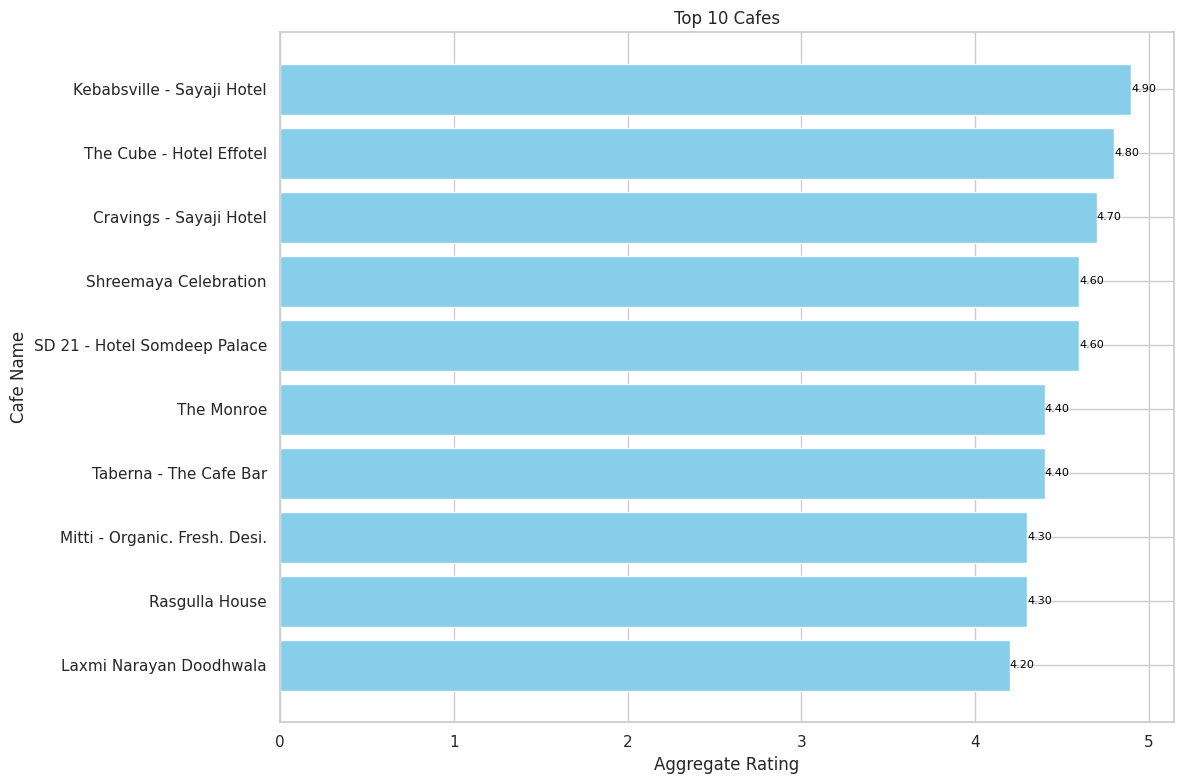

In [ ]:
cafes = df_1[df_1['listed_in(type)'].str.contains('Cafes', na=False)]

# Remove duplicate entries based on the 'name' column
cafes = cafes.drop_duplicates(subset='name')

# Sort by aggregate rating in descending order and select the top 10
top_cafes = cafes.sort_values(by='aggregate_rating', ascending=False).head(10)

# Print the top cafes
print(top_cafes[['name', 'aggregate_rating']])

# Plotting the top cafes
plt.figure(figsize=(12, 8))
bars = plt.barh(top_cafes['name'], top_cafes['aggregate_rating'], color='skyblue')
plt.xlabel('Aggregate Rating')
plt.ylabel('Cafe Name')
plt.title('Top 10 Cafes')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rated cafe at the top

# Add bar labels
for bar in bars:
    plt.text(
        bar.get_width(),  # x-coordinate position
        bar.get_y() + bar.get_height() / 2,  # y-coordinate position
        f'{bar.get_width():.2f}',  # Label with two decimal points
        va='center',  # Centered vertical alignment
        ha='left',  # Left horizontal alignment
        fontsize=8,  # Font size
        color='black'  # Text color
    )

plt.tight_layout()
plt.show()

Best Bakery in Indore

                                               name  aggregate_rating
23                            Shreemaya Celebration               4.6
304                                          Simi's               4.6
306                          Masters Bakery Krozzon               4.6
137   Indore Baking Company - Indore Marriott Hotel               4.4
357                               Cakesmith's Alley               4.3
365                                    Cakes & More               4.3
1                                      Bake N Shake               4.2
385                                    Bake Affaire               4.2
1051                              Ratan Sev Bhandar               4.2
84                         Parag Bakery & Fast Food               4.1


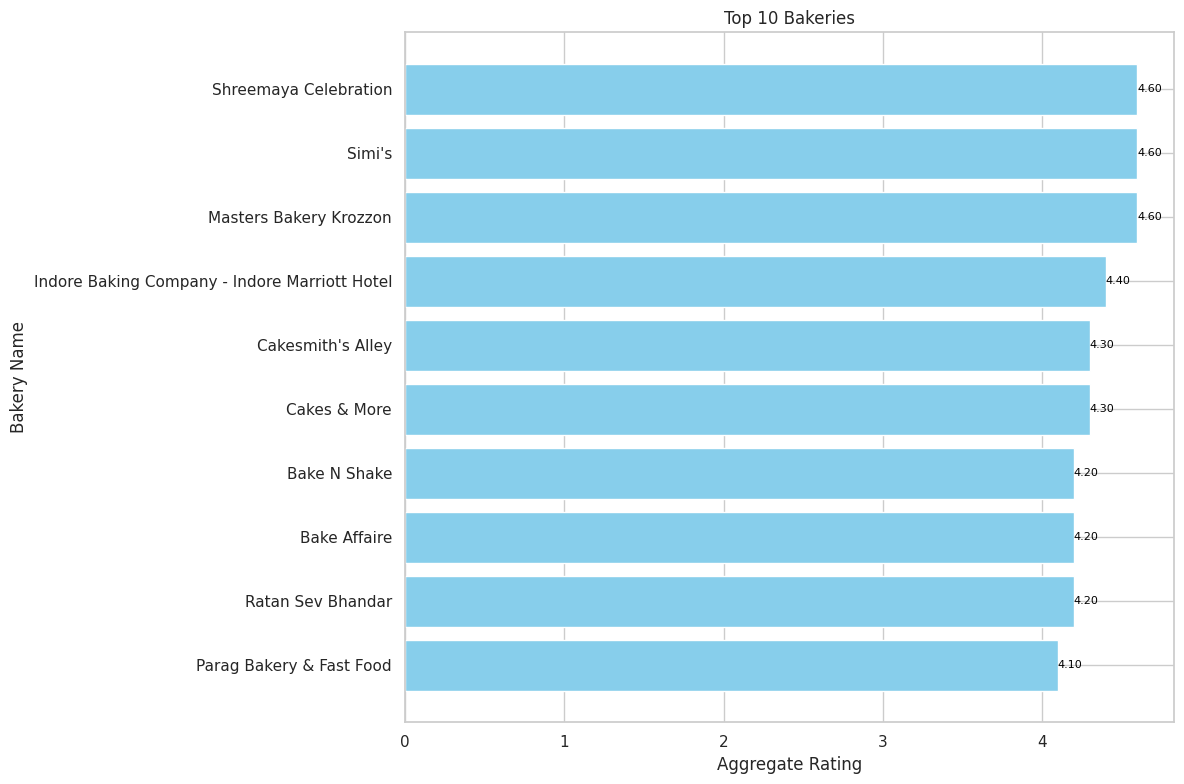

In [ ]:
bakeries = df_1[df_1['cuisines'].str.contains('Bakery', na=False)]

# Remove duplicate entries based on the 'name' column
bakeries = bakeries.drop_duplicates(subset='name')

# Sort by aggregate rating in descending order and select the top 10
top_bakeries = bakeries.sort_values(by='aggregate_rating', ascending=False).head(10)

# Print the top bakeries
print(top_bakeries[['name', 'aggregate_rating']])

# Plotting the top bakeries
plt.figure(figsize=(12, 8))
bars = plt.barh(top_bakeries['name'], top_bakeries['aggregate_rating'], color='skyblue')
plt.xlabel('Aggregate Rating')
plt.ylabel('Bakery Name')
plt.title('Top 10 Bakeries')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rated bakery at the top

# Add bar labels
for bar in bars:
    plt.text(
        bar.get_width(),  # x-coordinate position
        bar.get_y() + bar.get_height() / 2,  # y-coordinate position
        f'{bar.get_width():.2f}',  # Label with two decimal points
        va='center',  # Centered vertical alignment
        ha='left',  # Left horizontal alignment
        fontsize=8,  # Font size
        color='black'  # Text color
    )

plt.tight_layout()
plt.show()

 Best Dine-out places in Indore

                                name  aggregate_rating
669            Joshi Dahi Bada House               4.9
2349      Kebabsville - Sayaji Hotel               4.9
738         The Cube - Hotel Effotel               4.8
2338         Cravings - Sayaji Hotel               4.7
837               Naturals Ice Cream               4.7
2276  Mustang - Hotel Somdeep Palace               4.7
953           Masters Bakery Krozzon               4.6
765                   Chang's Legacy               4.6
736     SD 21 - Hotel Somdeep Palace               4.6
771                      Stars N Sky               4.6


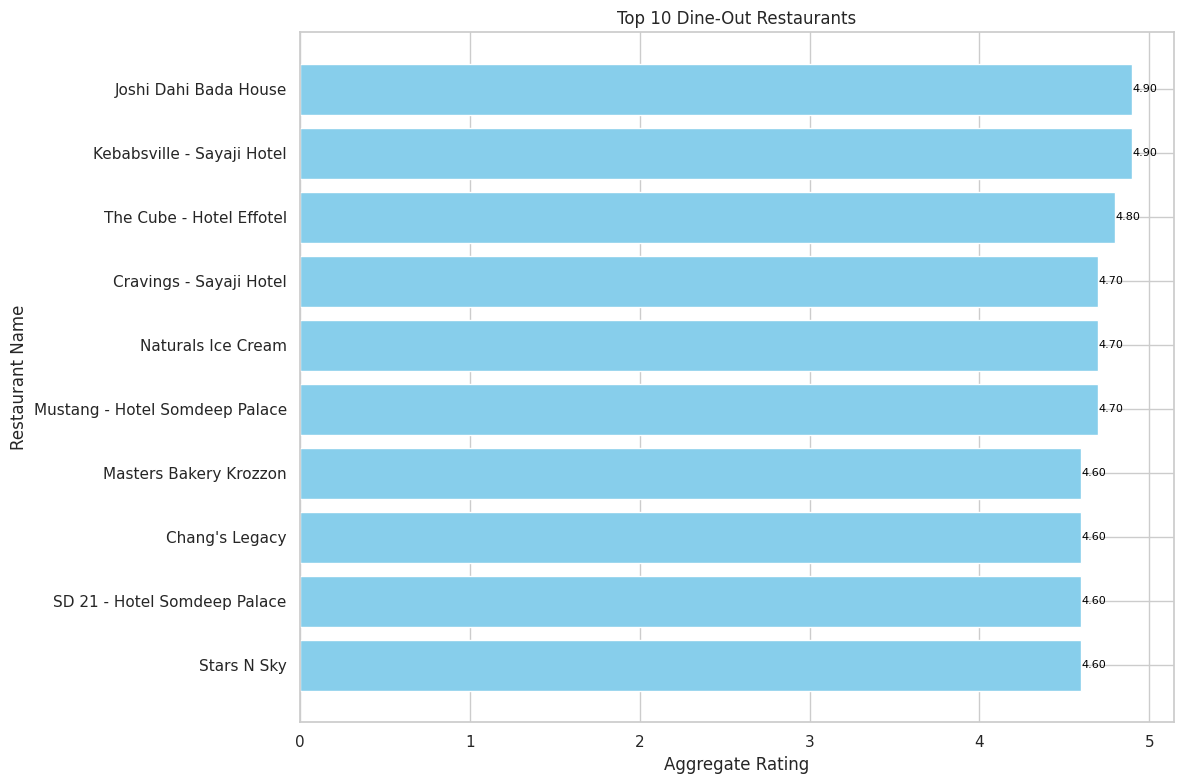

In [ ]:
dine_outs = df_1[df_1['listed_in(type)'].str.contains('Dine-out', na=False)]

# Remove duplicate entries based on the 'name' column
dine_outs = dine_outs.drop_duplicates(subset='name')

# Sort by aggregate rating in descending order and select the top 10
top_dine_outs = dine_outs.sort_values(by='aggregate_rating', ascending=False).head(10)

# Print the top dine-outs
print(top_dine_outs[['name', 'aggregate_rating']])

# Plotting the top dine-outs
plt.figure(figsize=(12, 8))
bars = plt.barh(top_dine_outs['name'], top_dine_outs['aggregate_rating'], color='skyblue')
plt.xlabel('Aggregate Rating')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Dine-Out Restaurants')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rated restaurant at the top

# Add bar labels
for bar in bars:
    plt.text(
        bar.get_width(),  # x-coordinate position
        bar.get_y() + bar.get_height() / 2,  # y-coordinate position
        f'{bar.get_width():.2f}',  # Label with two decimal points
        va='center',  # Centered vertical alignment
        ha='left',  # Left horizontal alignment
        fontsize=8,  # Font size
        color='black'  # Text color
    )

plt.tight_layout()
plt.show()

Best Mithai Places in Indore

                                    name  aggregate_rating
8                            Apna Sweets               4.3
37                        Rasgulla House               4.3
391              Laxmi Narayan Doodhwala               4.2
1051                   Ratan Sev Bhandar               4.2
1054           Suresh Namkeen and Sweets               4.1
43    Raja Ram - Dhaba, Sweets & Namkeen               4.1
1058                       Nagori Sweets               4.1
21                       Madhuram Sweets               4.0
1048                       Mishri Sweets               4.0
1055           Vikas Sweets & Restaurant               3.9


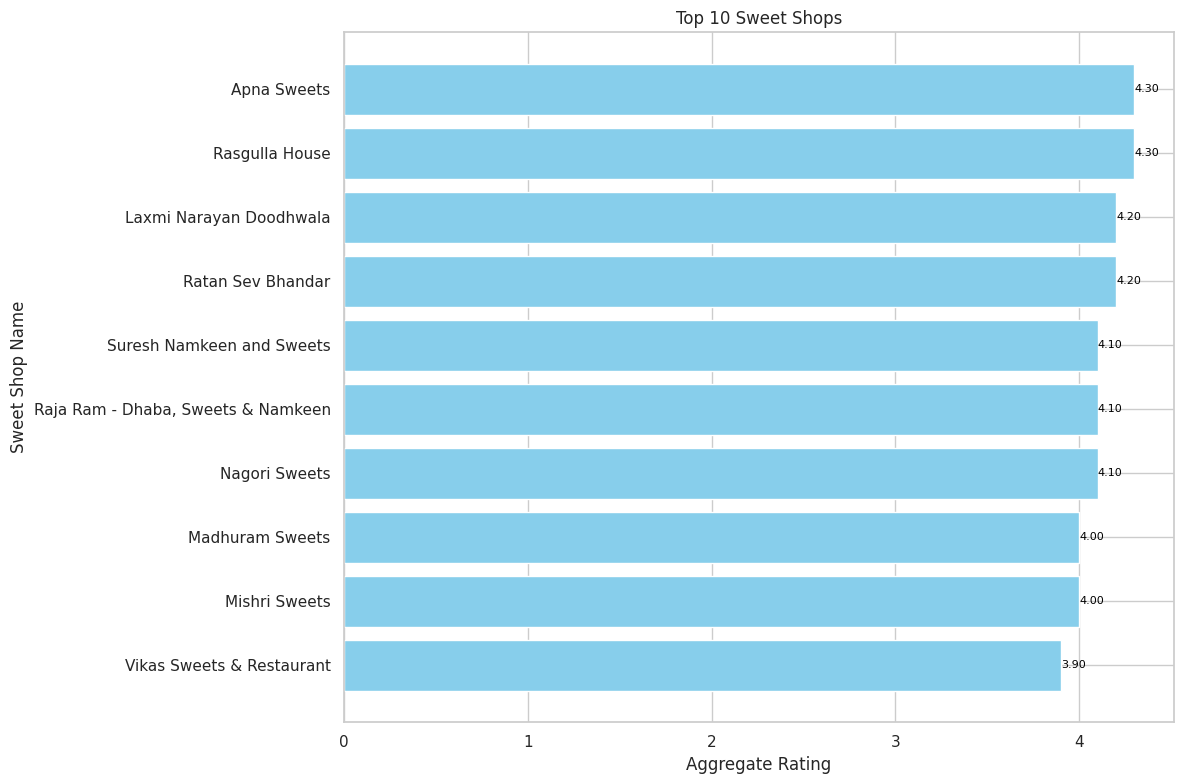

In [ ]:
sweet_shops = df_1[df_1['cuisines'].str.contains('Mithai', na=False)]

# Remove duplicate entries based on the 'name' column
sweet_shops = sweet_shops.drop_duplicates(subset='name')

# Sort by aggregate rating in descending order and select the top 10
top_sweet_shops = sweet_shops.sort_values(by='aggregate_rating', ascending=False).head(10)

# Print the top sweet shops
print(top_sweet_shops[['name', 'aggregate_rating']])

# Plotting the top sweet shops
plt.figure(figsize=(12, 8))
bars = plt.barh(top_sweet_shops['name'], top_sweet_shops['aggregate_rating'], color='skyblue')
plt.xlabel('Aggregate Rating')
plt.ylabel('Sweet Shop Name')
plt.title('Top 10 Sweet Shops')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rated sweet shop at the top

# Add bar labels
for bar in bars:
    plt.text(
        bar.get_width(),  # x-coordinate position
        bar.get_y() + bar.get_height() / 2,  # y-coordinate position
        f'{bar.get_width():.2f}',  # Label with two decimal points
        va='center',  # Centered vertical alignment
        ha='left',  # Left horizontal alignment
        fontsize=8,  # Font size
        color='black'  # Text color
    )

plt.tight_layout()
plt.show()

Best North Indian Places in Indore

                               name  aggregate_rating
22       Kebabsville - Sayaji Hotel               4.9
17         The Cube - Hotel Effotel               4.8
64   Mustang - Hotel Somdeep Palace               4.7
14          Cravings - Sayaji Hotel               4.7
50          Hobnob Gourmet CafÃ©bar               4.6
23            Shreemaya Celebration               4.6
160                     Stars N Sky               4.6
11     SD 21 - Hotel Somdeep Palace               4.6
91                   Chang's Legacy               4.6
309             Shreemaya Celebrity               4.5


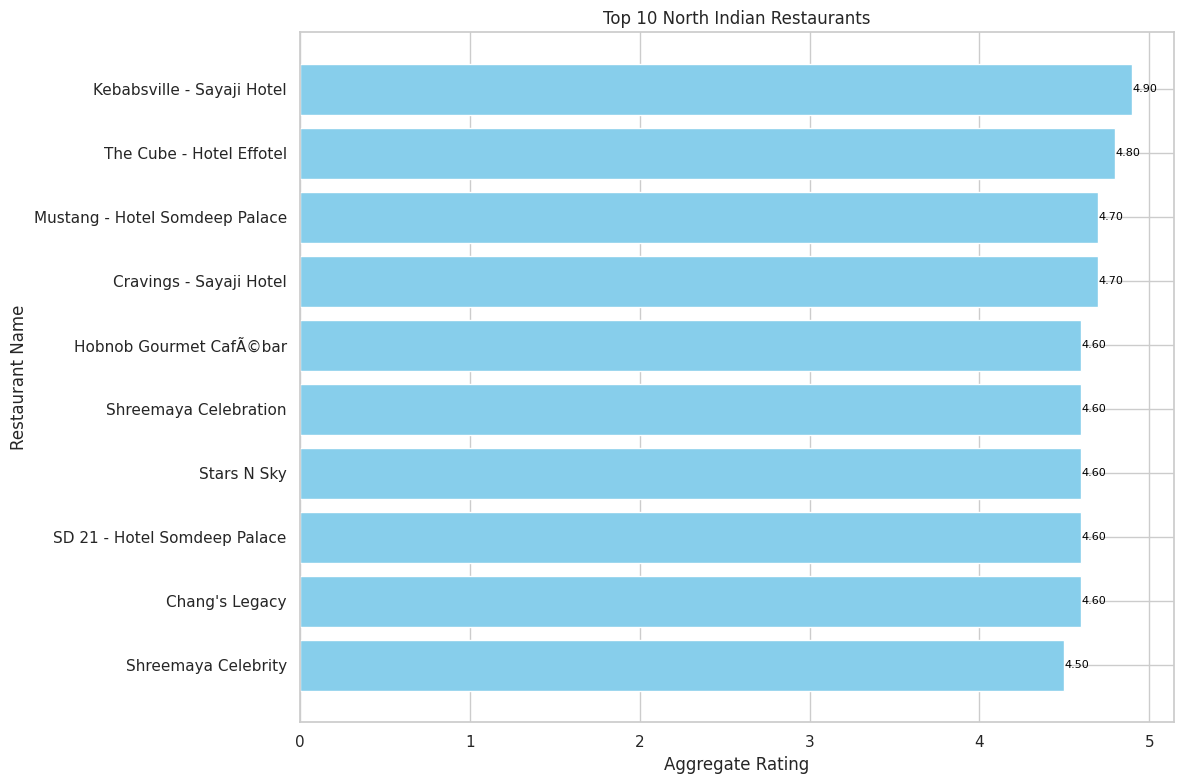

In [ ]:
north_indian_restaurants = df_1[df_1['cuisines'].str.contains('North Indian', na=False)]

# Remove duplicate entries based on the 'name' column
north_indian_restaurants = north_indian_restaurants.drop_duplicates(subset='name')

# Sort by aggregate rating in descending order and select the top 10
top_north_indian_restaurants = north_indian_restaurants.sort_values(by='aggregate_rating', ascending=False).head(10)

# Print the top North Indian restaurants
print(top_north_indian_restaurants[['name', 'aggregate_rating']])

# Plotting the top North Indian restaurants
plt.figure(figsize=(12, 8))
bars = plt.barh(top_north_indian_restaurants['name'], top_north_indian_restaurants['aggregate_rating'], color='skyblue')
plt.xlabel('Aggregate Rating')
plt.ylabel('Restaurant Name')
plt.title('Top 10 North Indian Restaurants')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rated restaurant at the top

# Add bar labels
for bar in bars:
    plt.text(
        bar.get_width(),  # x-coordinate position
        bar.get_y() + bar.get_height() / 2,  # y-coordinate position
        f'{bar.get_width():.2f}',  # Label with two decimal points
        va='center',  # Centered vertical alignment
        ha='left',  # Left horizontal alignment
        fontsize=8,  # Font size
        color='black'  # Text color
    )

plt.tight_layout()
plt.show()

Best South Indian restaraunts in Indore

                           name  aggregate_rating
23        Shreemaya Celebration               4.6
309         Shreemaya Celebrity               4.5
8                   Apna Sweets               4.3
347                 Banana Leaf               4.3
7                  Maa Ki Rasoi               4.1
12                  Sagar Gaire               4.1
2103                 Cafe Udipi               4.1
2097  Anand Shree Fruit Bonanza               4.0
836                 Romba South               4.0
702    Sharma Namkeen Mithaiyan               4.0


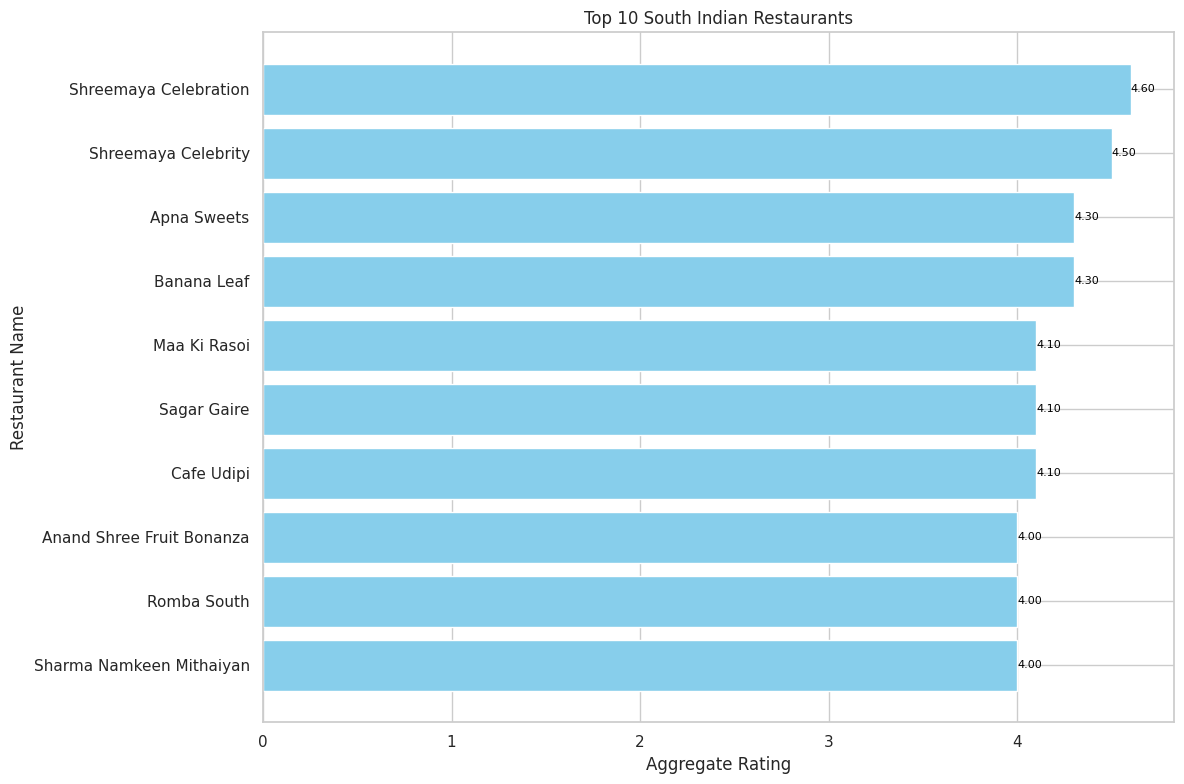

In [ ]:
# Filter the dataset for South Indian restaurants
south_indian_restaurants = df_1[df_1['cuisines'].str.contains('South Indian', na=False)]

# Remove duplicate entries based on the 'name' column
south_indian_restaurants = south_indian_restaurants.drop_duplicates(subset='name')

# Sort by aggregate rating in descending order and select the top 10
top_south_indian_restaurants = south_indian_restaurants.sort_values(by='aggregate_rating', ascending=False).head(10)

# Print the top South Indian restaurants
print(top_south_indian_restaurants[['name', 'aggregate_rating']])

# Plotting the top South Indian restaurants
plt.figure(figsize=(12, 8))
bars = plt.barh(top_south_indian_restaurants['name'], top_south_indian_restaurants['aggregate_rating'], color='skyblue')
plt.xlabel('Aggregate Rating')
plt.ylabel('Restaurant Name')
plt.title('Top 10 South Indian Restaurants')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rated restaurant at the top

# Add bar labels
for bar in bars:
    plt.text(
        bar.get_width(),  # x-coordinate position
        bar.get_y() + bar.get_height() / 2,  # y-coordinate position
        f'{bar.get_width():.2f}',  # Label with two decimal points
        va='center',  # Centered vertical alignment
        ha='left',  # Left horizontal alignment
        fontsize=8,  # Font size
        color='black'  # Text color
    )

plt.tight_layout()
plt.show()

Best fast food restaraunts in Indore

                                       name  aggregate_rating
306                  Masters Bakery Krozzon               4.6
23                    Shreemaya Celebration               4.6
66                            Johny Hot Dog               4.5
58                         Cafe Chapter One               4.5
63                          Bollywood Theka               4.4
332                  Atul Sandwich And Cafe               4.4
88                           Mukki Ke Zayke               4.4
32                              Tic Tac Toe               4.4
35   Indore Kitchen - Indore Marriott Hotel               4.4
355                          Pleasure House               4.3


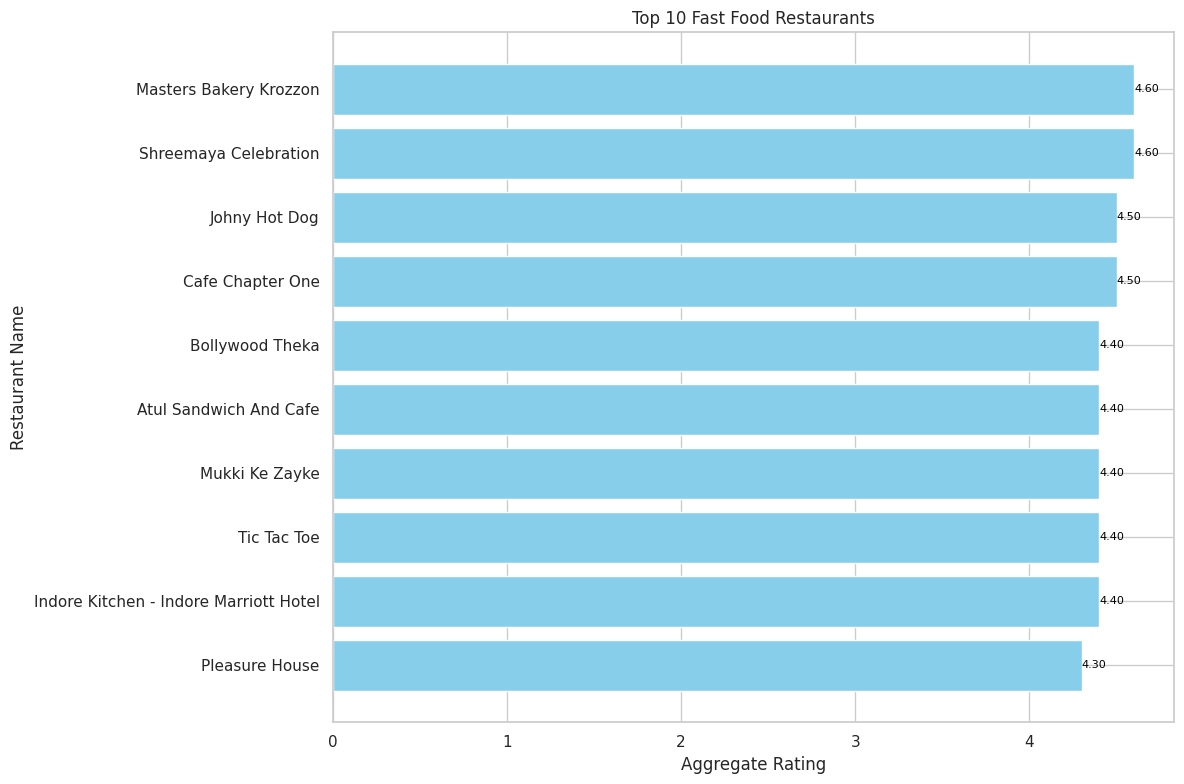

In [ ]:
# Filter the dataset for Fast Food restaurants
fast_food_restaurants = df_1[df_1['cuisines'].str.contains('Fast Food', na=False)]

# Remove duplicate entries based on the 'name' column
fast_food_restaurants = fast_food_restaurants.drop_duplicates(subset='name')

# Sort by aggregate rating in descending order and select the top 10
top_fast_food_restaurants = fast_food_restaurants.sort_values(by='aggregate_rating', ascending=False).head(10)

# Print the top Fast Food restaurants
print(top_fast_food_restaurants[['name', 'aggregate_rating']])

# Plotting the top Fast Food restaurants
plt.figure(figsize=(12, 8))
bars = plt.barh(top_fast_food_restaurants['name'], top_fast_food_restaurants['aggregate_rating'], color='skyblue')
plt.xlabel('Aggregate Rating')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Fast Food Restaurants')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rated restaurant at the top

# Add bar labels
for bar in bars:
    plt.text(
        bar.get_width(),  # x-coordinate position
        bar.get_y() + bar.get_height() / 2,  # y-coordinate position
        f'{bar.get_width():.2f}',  # Label with two decimal points
        va='center',  # Centered vertical alignment
        ha='left',  # Left horizontal alignment
        fontsize=8,  # Font size
        color='black'  # Text color
    )

plt.tight_layout()
plt.show()

Best Continental restaraunts in Indore

                                          name  aggregate_rating
50                     Hobnob Gourmet CafÃ©bar               4.6
185                     Capers - Hotel Effotel               4.5
81                        The GroundBaking Co.               4.4
44                                    Patissez               4.3
49                                   Mama Loca               4.3
184                           Fagun Restaurant               4.3
36                                       Mocha               4.2
132                                Farzi CafÃ©               4.2
186                  Hotel Shreemaya Residency               4.2
110  The Creative Kitchen - Radisson Blu Hotel               4.1


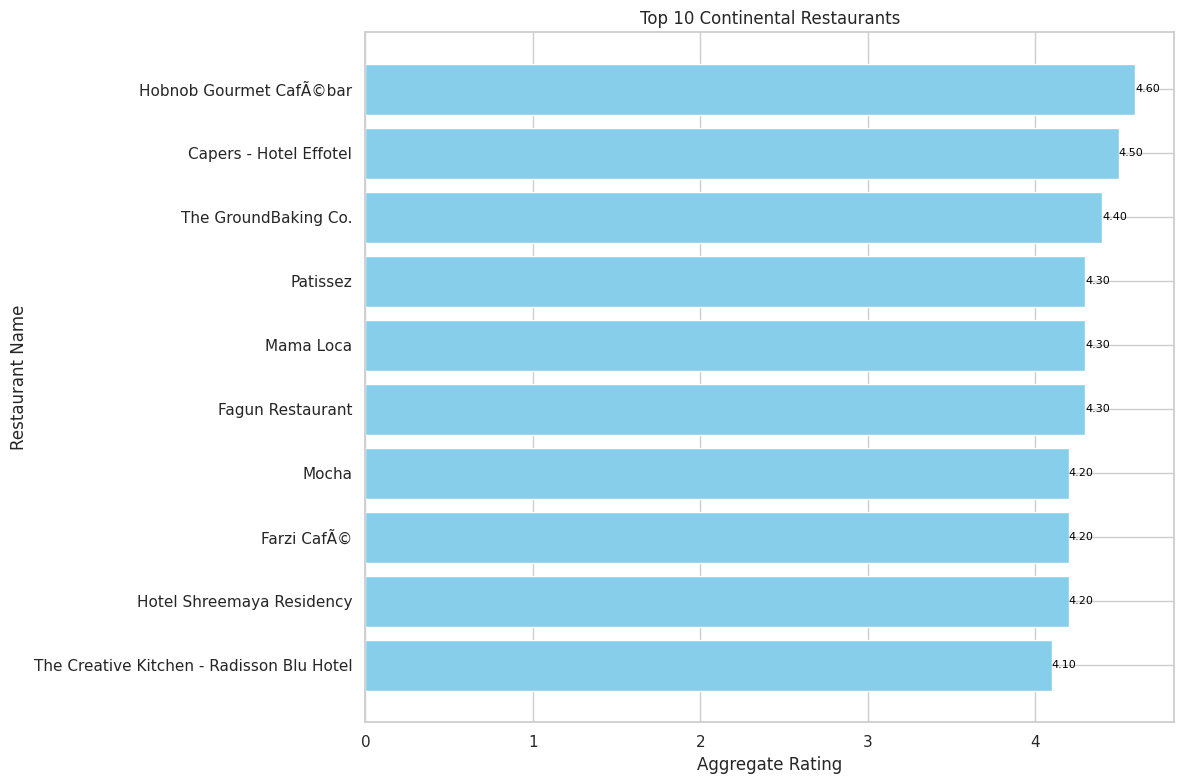

In [ ]:
continental_restaurants = df_1[df_1['cuisines'].str.contains('Continental', na=False)]

# Remove duplicate entries based on the 'name' column
continental_restaurants = continental_restaurants.drop_duplicates(subset='name')

# Sort by aggregate rating in descending order and select the top 10
top_continental_restaurants = continental_restaurants.sort_values(by='aggregate_rating', ascending=False).head(10)

# Print the top Continental restaurants
print(top_continental_restaurants[['name', 'aggregate_rating']])

# Plotting the top Continental restaurants
plt.figure(figsize=(12, 8))
bars = plt.barh(top_continental_restaurants['name'], top_continental_restaurants['aggregate_rating'], color='skyblue')
plt.xlabel('Aggregate Rating')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Continental Restaurants')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rated restaurant at the top

# Add bar labels
for bar in bars:
    plt.text(
        bar.get_width(),  # x-coordinate position
        bar.get_y() + bar.get_height() / 2,  # y-coordinate position
        f'{bar.get_width():.2f}',  # Label with two decimal points
        va='center',  # Centered vertical alignment
        ha='left',  # Left horizontal alignment
        fontsize=8,  # Font size
        color='black'  # Text color
    )

plt.tight_layout()
plt.show()

Best Chinese restaraunts in Indore

                                 name  aggregate_rating
17           The Cube - Hotel Effotel               4.8
64     Mustang - Hotel Somdeep Palace               4.7
14            Cravings - Sayaji Hotel               4.7
11       SD 21 - Hotel Somdeep Palace               4.6
160                       Stars N Sky               4.6
116       Ni Hao - Radisson Blu Hotel               4.6
91                     Chang's Legacy               4.6
185            Capers - Hotel Effotel               4.5
309               Shreemaya Celebrity               4.5
111  One Asia - Indore Marriott Hotel               4.5


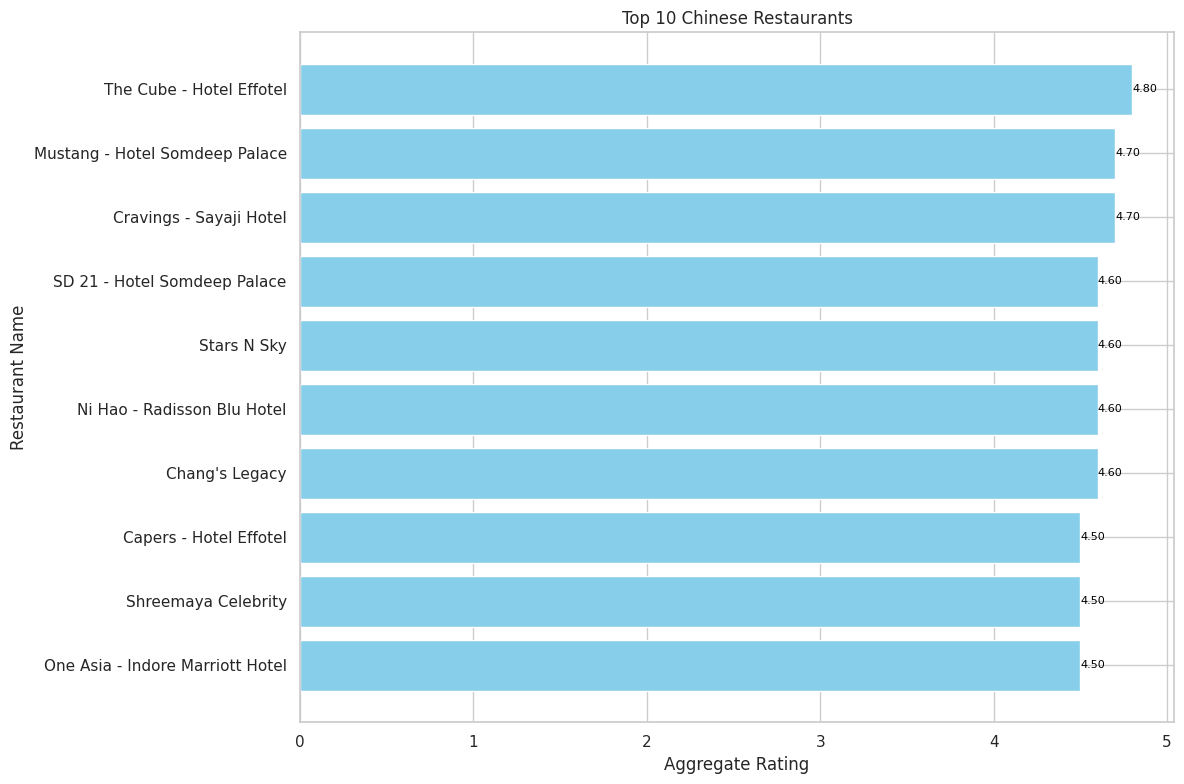

In [ ]:
# Filter the dataset for Chinese restaurants
chinese_restaurants = df_1[df_1['cuisines'].str.contains('Chinese', na=False)]

# Remove duplicate entries based on the 'name' column
chinese_restaurants = chinese_restaurants.drop_duplicates(subset='name')

# Sort by aggregate rating in descending order and select the top 10
top_chinese_restaurants = chinese_restaurants.sort_values(by='aggregate_rating', ascending=False).head(10)

# Print the top Chinese restaurants
print(top_chinese_restaurants[['name', 'aggregate_rating']])

# Plotting the top Chinese restaurants
plt.figure(figsize=(12, 8))
bars = plt.barh(top_chinese_restaurants['name'], top_chinese_restaurants['aggregate_rating'], color='skyblue')
plt.xlabel('Aggregate Rating')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Chinese Restaurants')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rated restaurant at the top

# Add bar labels
for bar in bars:
    plt.text(
        bar.get_width(),  # x-coordinate position
        bar.get_y() + bar.get_height() / 2,  # y-coordinate position
        f'{bar.get_width():.2f}',  # Label with two decimal points
        va='center',  # Centered vertical alignment
        ha='left',  # Left horizontal alignment
        fontsize=8,  # Font size
        color='black'  # Text color
    )

plt.tight_layout()
plt.show()

Best Italian Restaraunts in Indore

                                       name  aggregate_rating
17                 The Cube - Hotel Effotel               4.8
14                  Cravings - Sayaji Hotel               4.7
50                  Hobnob Gourmet CafÃ©bar               4.6
185                  Capers - Hotel Effotel               4.5
162                            Little Italy               4.5
108                Mediterra - Sayaji Hotel               4.5
58                         Cafe Chapter One               4.5
309                     Shreemaya Celebrity               4.5
27                               The Monroe               4.4
35   Indore Kitchen - Indore Marriott Hotel               4.4


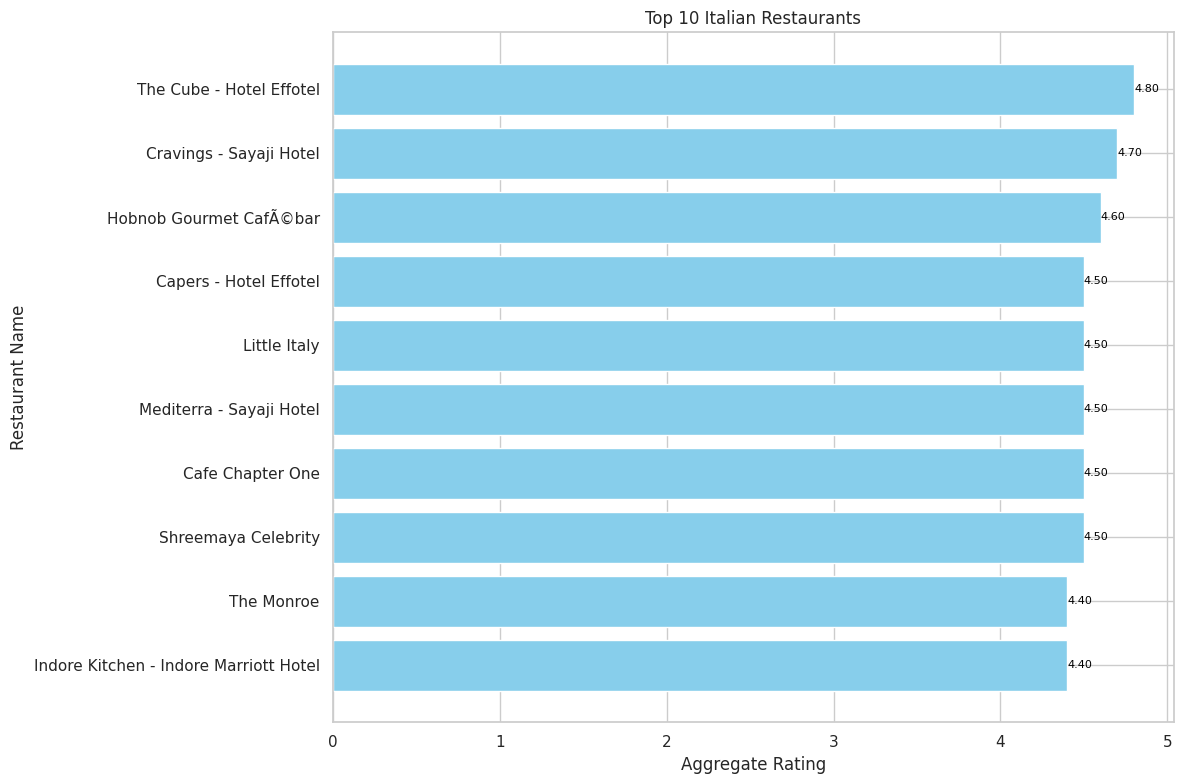

In [ ]:
italian_restaurants = df_1[df_1['cuisines'].str.contains('Italian', na=False)]

# Remove duplicate entries based on the 'name' column
italian_restaurants = italian_restaurants.drop_duplicates(subset='name')

# Sort by aggregate rating in descending order and select the top 10
top_italian_restaurants = italian_restaurants.sort_values(by='aggregate_rating', ascending=False).head(10)

# Print the top Italian restaurants
print(top_italian_restaurants[['name', 'aggregate_rating']])

# Plotting the top Italian restaurants
plt.figure(figsize=(12, 8))
bars = plt.barh(top_italian_restaurants['name'], top_italian_restaurants['aggregate_rating'], color='skyblue')
plt.xlabel('Aggregate Rating')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Italian Restaurants')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rated restaurant at the top

# Add bar labels
for bar in bars:
    plt.text(
        bar.get_width(),  # x-coordinate position
        bar.get_y() + bar.get_height() / 2,  # y-coordinate position
        f'{bar.get_width():.2f}',  # Label with two decimal points
        va='center',  # Centered vertical alignment
        ha='left',  # Left horizontal alignment
        fontsize=8,  # Font size
        color='black'  # Text color
    )

plt.tight_layout()
plt.show()